# Crop Prediction

### Importing Libraries

In [1]:
import pandas as pd #Data Analysis
import numpy as np #Linear algebra

#Importing libraries for data visualization
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
%matplotlib inline

import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#Machine Learning Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgbm
from catboost import CatBoostClassifier  
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb


In [2]:
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

### Loading Data

In [3]:
df = pd.read_csv('Crop_recommendation.csv')
df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

# Exploratory Data Analysis(EDA)

##### Exploratory Data Analysis (EDA) is the process of examining and analyzing a dataset to understand its main characteristics, identify patterns, uncover relationships between variables, and gain insights.

In [4]:
df.shape

(2200, 8)

Dataset has 2200 rows and 8 columns

In [5]:
#Displaying the columns
df.columns


Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


###### The ```df.info() function``` is useful for quickly understanding the structure and properties of the DataFrame, such as ```dentifying missing values or data types ``` that need to be converted.

In [7]:
df.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

#####  The ```df.describe() function``` is used to generate ````descriptive statistics ````of the numerical columns in the DataFrame. It provides various statistical measures that summarize the central tendency, dispersion, and shape of the distribution of the data.

In [8]:
#unique labels
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [9]:
df['label'].nunique() #Number of unique labels

22

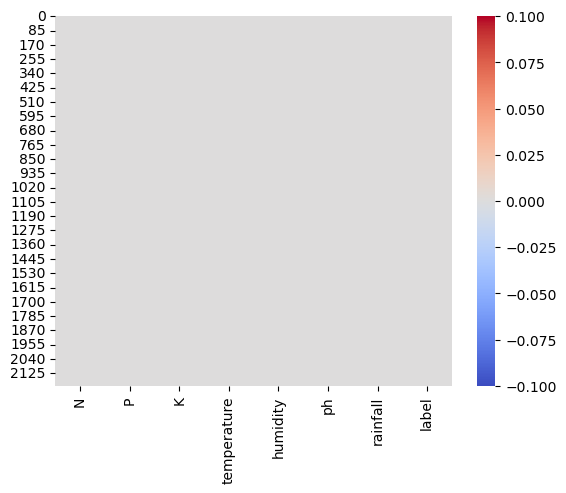

In [10]:
sns.heatmap(df.isnull(), cmap="coolwarm")
plt.show()

<AxesSubplot:xlabel='ph', ylabel='Density'>

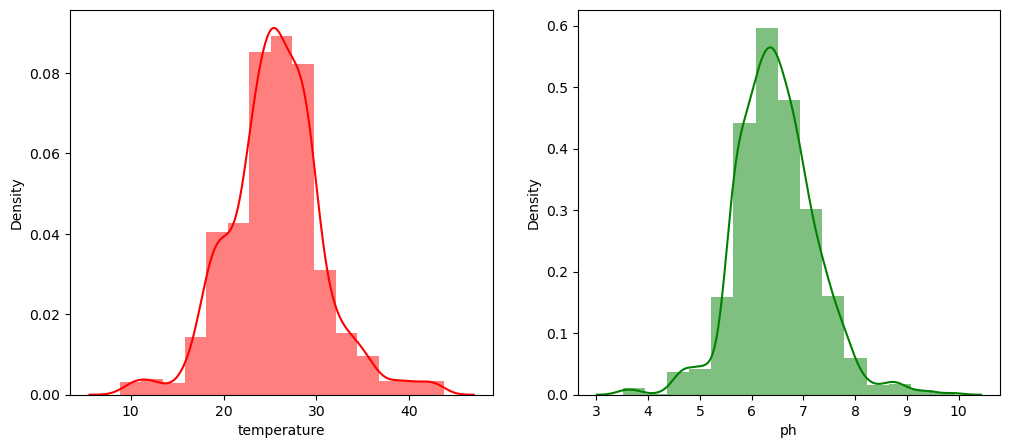

In [11]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
sns.distplot(df['temperature'], color = "red", 
            bins = 15, 
            hist_kws = {'alpha':0.5})

plt.subplot(1,2,2)
sns.distplot(df['ph'], color = "green",
           bins = 15,
           hist_kws = {'alpha':0.5})


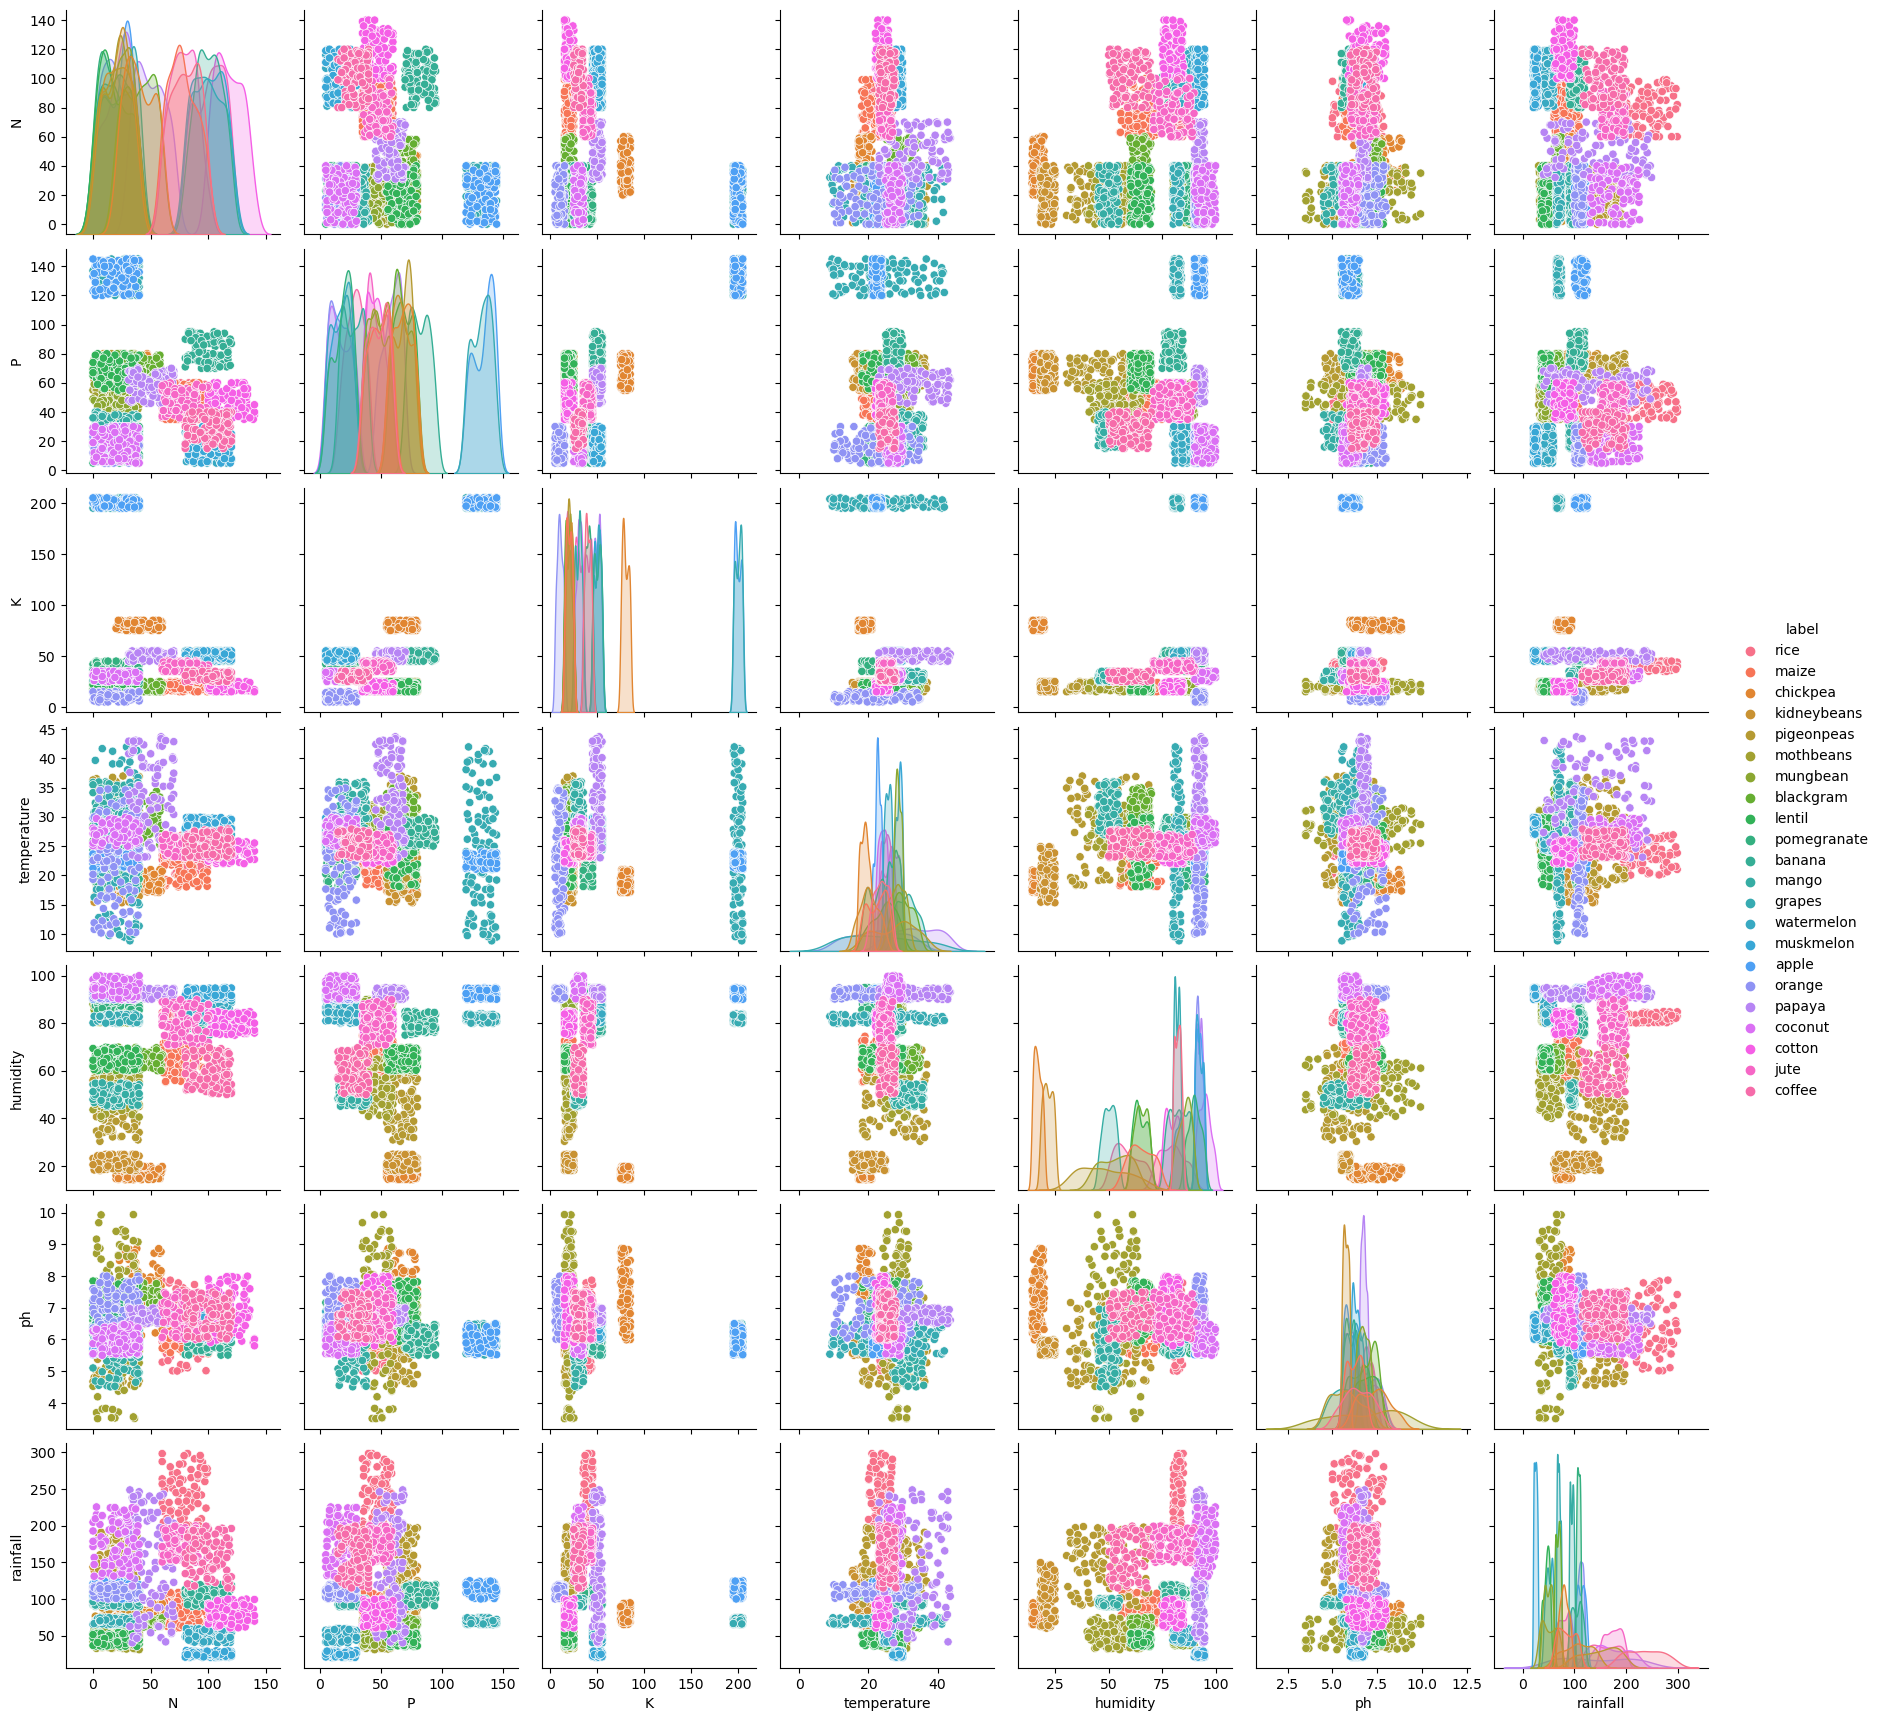

In [12]:
#pair plot
sns.pairplot(df, hue = 'label')

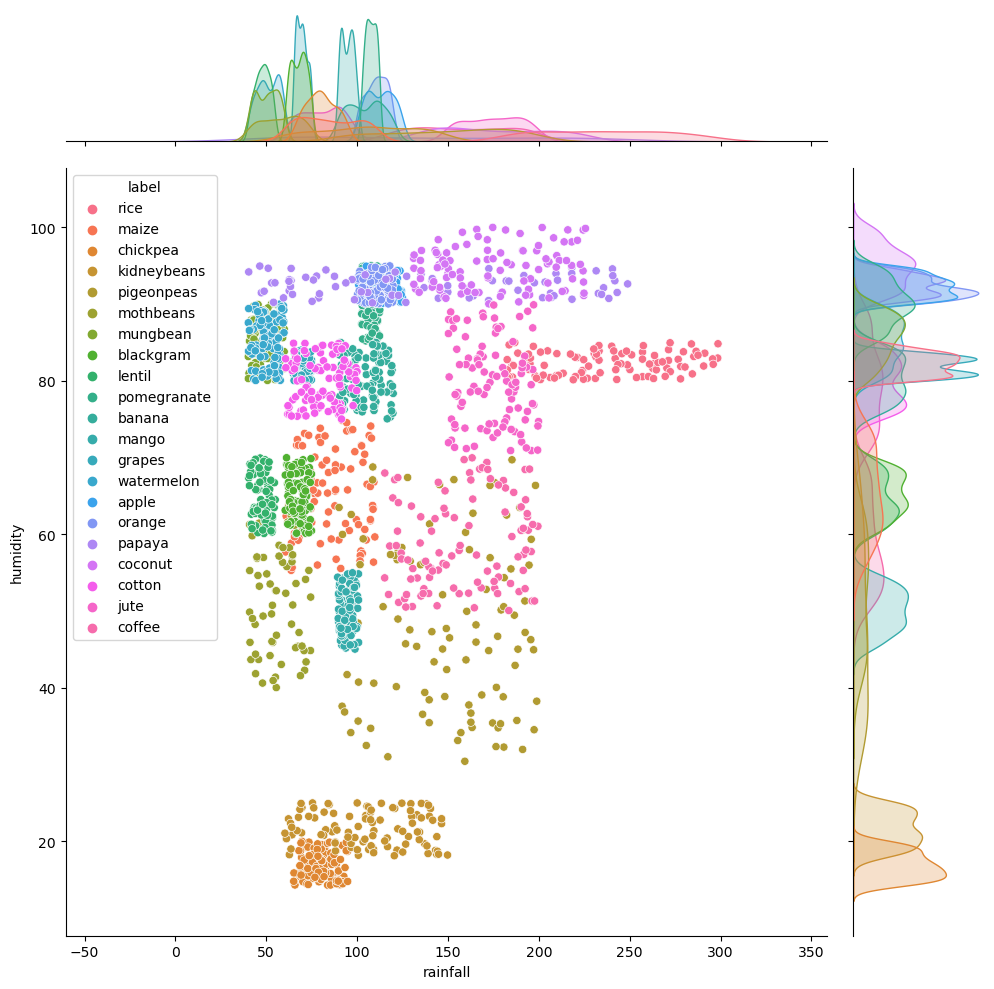

In [13]:
#Jointplot
sns.jointplot(x = "rainfall", y = "humidity", 
              data = df[(df['temperature'] < 40) & 
                         (df['rainfall'] > 40)], 
              height = 10, 
              hue = "label")

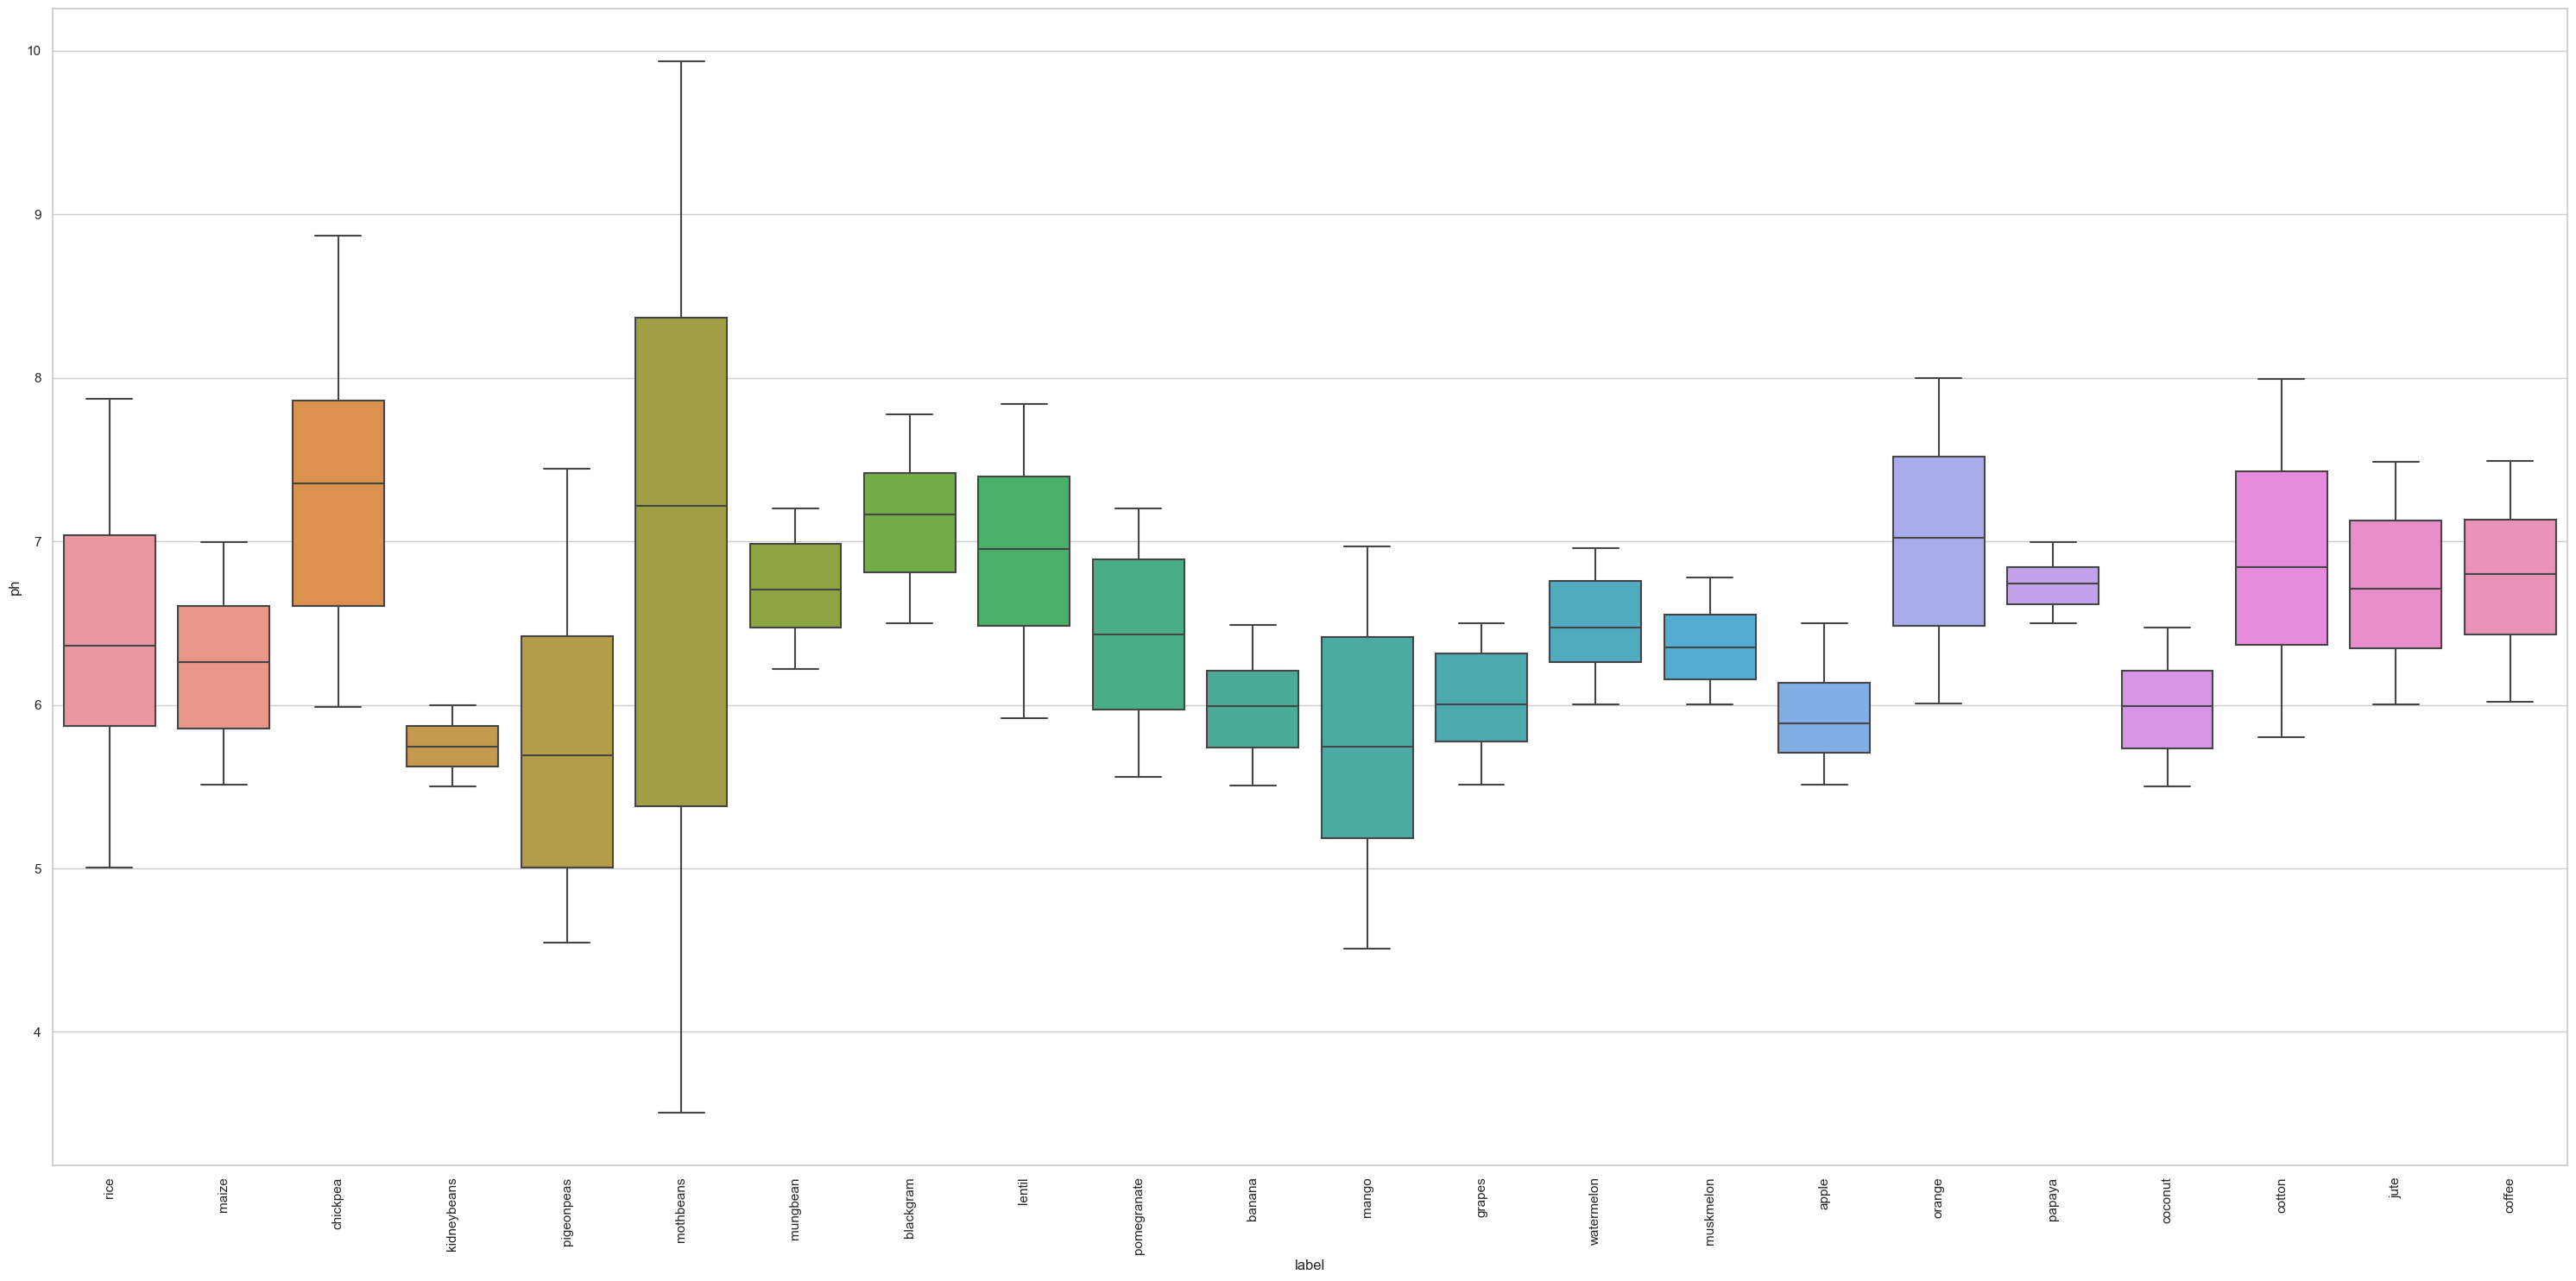

In [14]:
#Boxplot
sns.set_theme(style = "whitegrid")
fig, ax = plt.subplots(figsize = (30,15))
plt1 = sns.boxplot(x = 'label', y = 'ph', data = df)
xticks(rotation = 90)
plt.tight_layout()
plt.show()

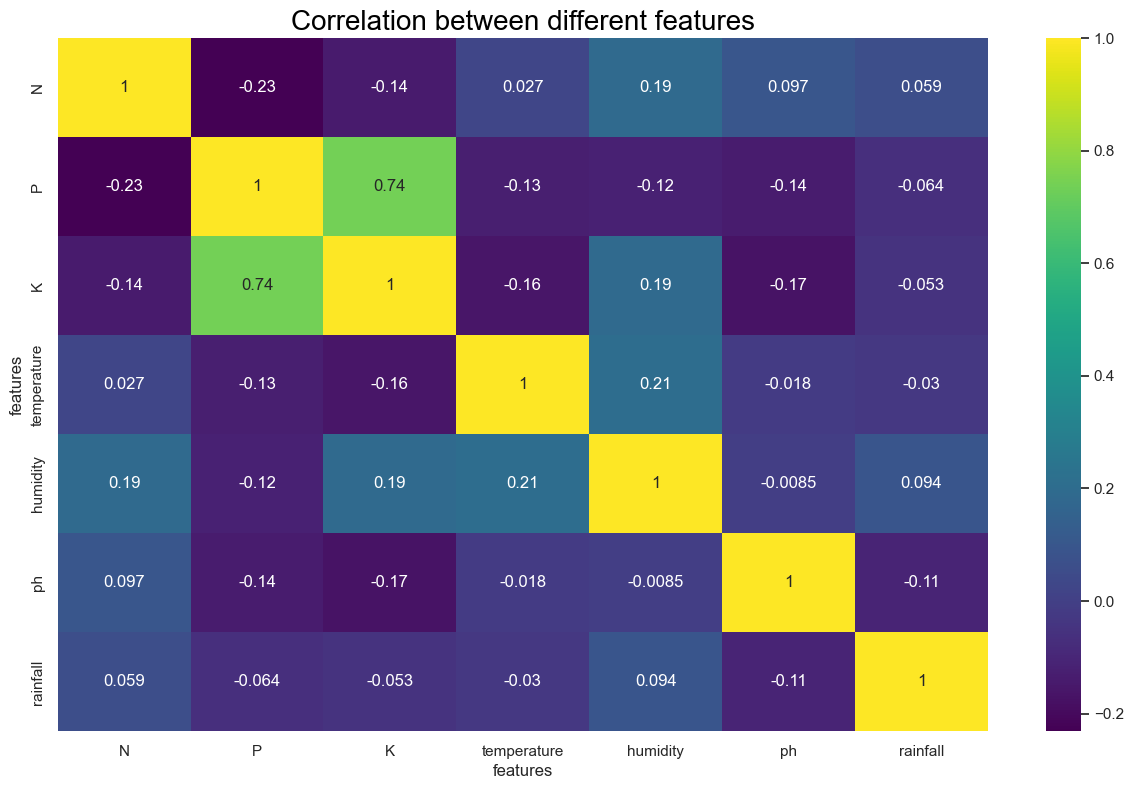

In [15]:
#Correlation heatmap

fig, ax = plt.subplots(1,1, figsize = (15, 9))
plt1 = sns.heatmap(df.corr(), annot = True, cmap = 'viridis')
plt1.set(xlabel = 'features')
plt1.set(ylabel = 'features')

plt.title("Correlation between different features", fontsize = 20, c = 'black')
plt.show()

In [16]:
#Crop summary with respect to mean

df_summary = pd.pivot_table(df, index = ['label'], aggfunc = 'mean')
df_summary.head()

K       N       P   humidity        ph    rainfall  \
label                                                                
apple      199.89   20.80  134.22  92.333383  5.929663  112.654779   
banana      50.05  100.23   82.01  80.358123  5.983893  104.626980   
blackgram   19.24   40.02   67.47  65.118426  7.133952   67.884151   
chickpea    79.92   40.09   67.79  16.860439  7.336957   80.058977   
coconut     30.59   21.98   16.93  94.844272  5.976562  175.686646   

           temperature  
label                   
apple        22.630942  
banana       27.376798  
blackgram    29.973340  
chickpea     18.872847  
coconut      27.409892

In [17]:
#N-P-K value comparision between crops

fig = go.Figure()
fig.add_trace(go.Bar(x = df_summary.index, 
                     y = df_summary['N'], 
                     name = 'Nitrogen',
                     marker_color = 'green'))

fig.add_trace(go.Bar(x = df_summary.index,
                    y = df_summary['P'],
                    name = 'Phosphorous',
                    marker_color = 'red'))

fig.add_trace(go.Bar(x = df_summary.index,
                    y = df_summary['K'],
                    name = 'Potash',
                    marker_color = 'blue'))

fig.update_layout(title = "N-P-K values comparision between crops",
                 plot_bgcolor = 'white',
                 barmode = 'group',
                 xaxis_tickangle = -90)

fig.show()

# Feature Selection

In [18]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [19]:
features = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']

#features
#target

In [20]:
# spliting Dataset into training 80% and testing 20% 

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 2)


# Modeling Classification algorithms

In [21]:
acc = []
model = []

# 1.Logistic Regression

In [22]:
#Logistic Regression

LR = LogisticRegression()
LR.fit(x_train, y_train)

LogisticRegression()

### Validation scores

In [23]:
#Validation scores

score = cross_val_score(LR, features, target, cv = 5)
print("Cross Validation Score: ", score)

Cross Validation Score:  [0.95       0.96590909 0.94772727 0.96590909 0.94318182]


### Train & Test Accuracy

In [24]:
#Train Accuracy
LR_train_accuracy = LR.score(x_train, y_train)
print("Logistic Regression Train Accuracy: ", LR_train_accuracy)

#Test Accuracy
LR_test_accuracy = LR.score(x_test, y_test)
print("Logistic Regression Test Accuracy: ", LR_test_accuracy)

Logistic Regression Train Accuracy:  0.9738636363636364
Logistic Regression Test Accuracy:  0.9522727272727273


### Predictions

In [25]:
y_predicted_values = LR.predict(x_test)
y_true_actual = y_test

metrics_accuracy = metrics.accuracy_score(y_true_actual, y_predicted_values)
acc.append(metrics_accuracy)
model.append('Logistic Regression')

print("Logistic Regression accuracy is ", metrics_accuracy)

Logistic Regression accuracy is  0.9522727272727273


# Classification Report

In [26]:
print("\n Classification Report:")
print(classification_report(y_true_actual, y_predicted_values))


 Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
  

# Confusion matrix

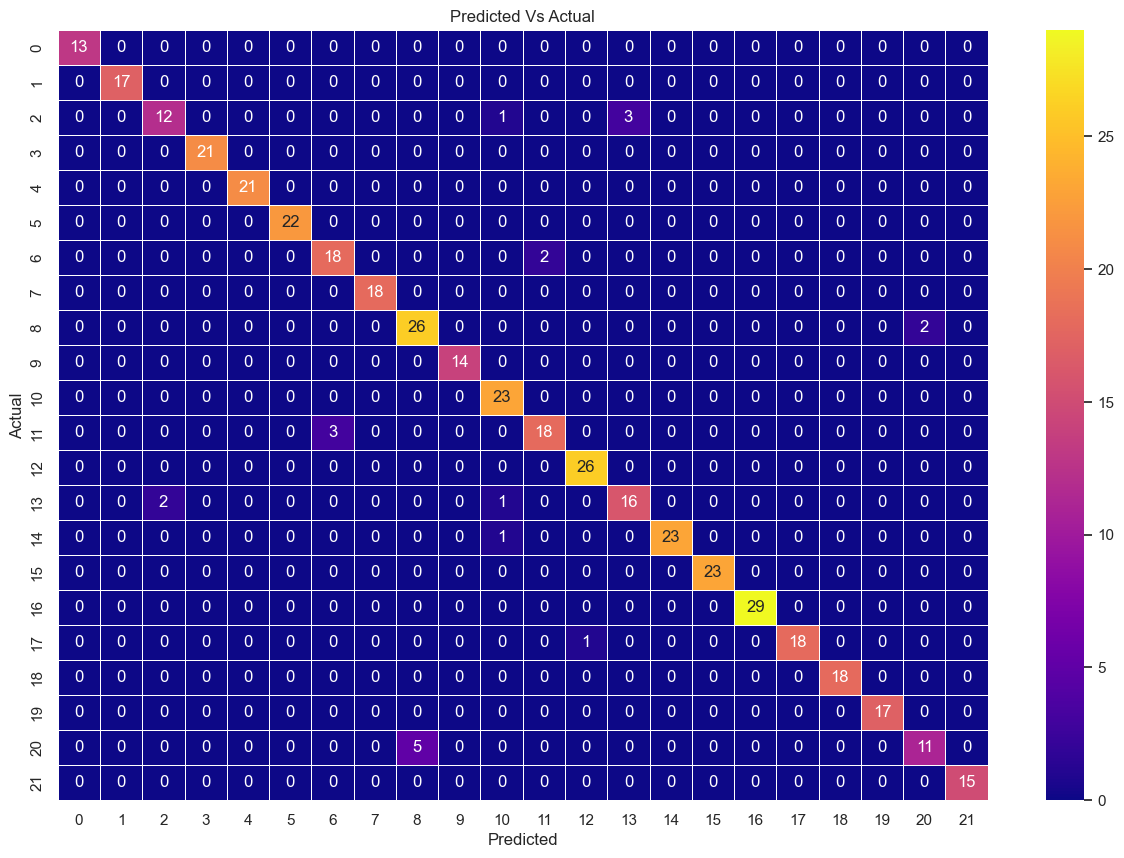

In [27]:
#Confusion Matrix

cm_LR = confusion_matrix(y_true_actual, y_predicted_values)

fig,ax = plt.subplots(figsize = (15,10))
sns.heatmap(cm_LR, annot = True, linewidth = 0.5, fmt = ".0f", cmap = 'plasma', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Predicted Vs Actual")
plt.show()

# 2.K-Nearest Neighbour (KNN)

In [28]:
#K-Nearest Neighbour (KNN)

knn = KNeighborsClassifier()

#fitting training data

knn.fit(x_train,y_train)


KNeighborsClassifier()

### During the ```fitting process```, the KNN algorithm`` stores the training data and its corresponding labels `` internally, so that it can use them to make predictions on new, unseen data points.



### Validation scores

In [29]:
#Validation scores

score = cross_val_score(knn, features, target, cv = 5)
print("Cross Validation score:", score)

Cross Validation score: [0.97727273 0.98181818 0.97954545 0.97954545 0.97954545]


### Train & Test Accuracy

In [30]:
# Train Accuracy

knn_train_accuracy = knn.score(x_train, y_train)
print("knn_train_accuracy = ", knn_train_accuracy)

#Test Accuracy
knn_test_accuracy = knn.score(x_test, y_test)
print("knn_test_accuracy = ", knn_test_accuracy)

knn_train_accuracy =  0.9886363636363636
knn_test_accuracy =  0.975


### Predictions

In [31]:
#Predictions

y_predicted_values = knn.predict(x_test)
y_true_actual = y_test

metrics_accuracy = metrics.accuracy_score(y_true_actual, y_predicted_values)
acc.append(metrics_accuracy)
model.append('K-Nearest Neighbour')

print("KNN Accuracy is ", metrics_accuracy)

KNN Accuracy is  0.975


# Classification Report

In [32]:
print("\n Classification Report:")
print(classification_report(y_true_actual, y_predicted_values))


 Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.89      0.86      0.87        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
  

# Confusion matrix

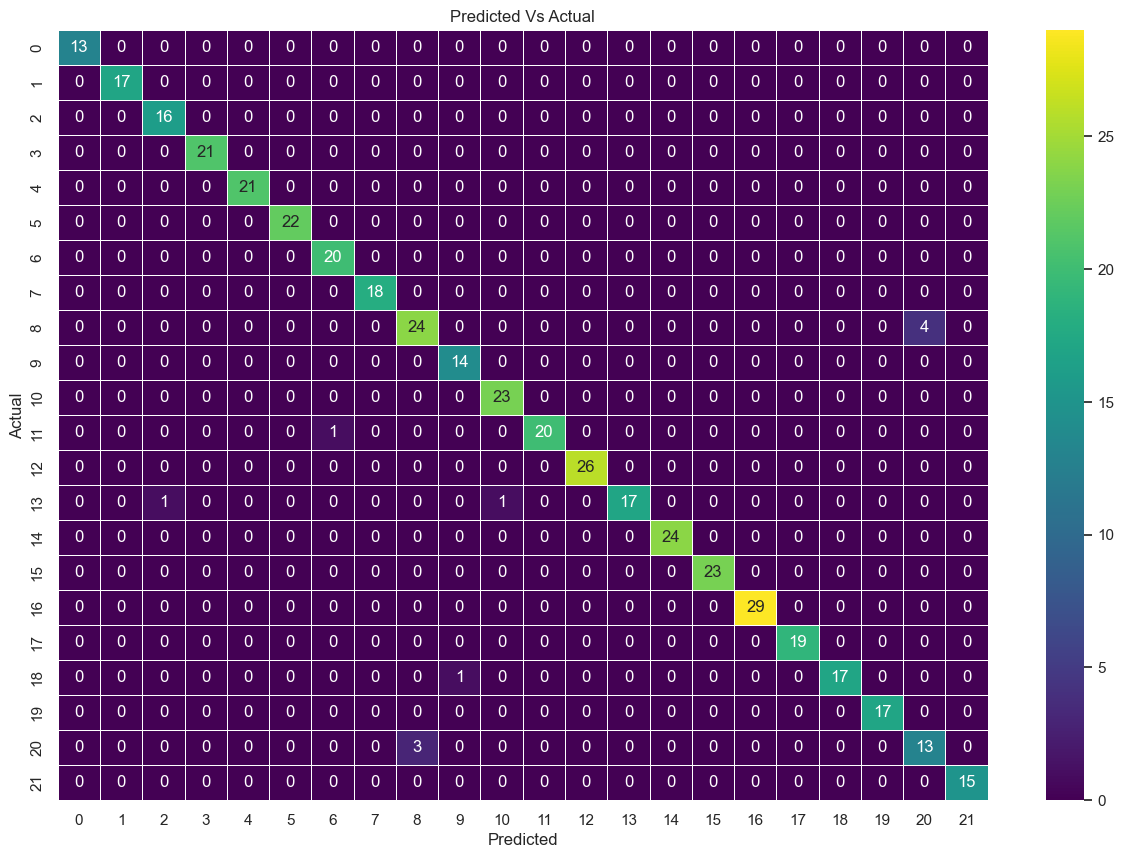

In [33]:
#Confusion matrix

cm_knn = confusion_matrix(y_true_actual, y_predicted_values)

fig,ax = plt.subplots(figsize = (15,10))
sns.heatmap(cm_knn, annot = True, linewidth = 0.5, fmt = ".0f", cmap = 'viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Predicted Vs Actual")
plt.show()

# KNN Hyperparameter Tuning

#### One of the challenges in a KNN algorithm is finding the best 'k' i.e. the number of neighbors to be used in the majority vote while deciding the class. Generally, it is advisable to test the accuracy of our model for different values of k and then select the best one from them.

In [34]:
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train model and predict
    knn = KNeighborsClassifier(n_neighbors = i).fit(x_train, y_train)
    yhat = knn.predict(x_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)
mean_acc

array([0.97045455, 0.96363636, 0.97045455, 0.96363636, 0.975     ,
       0.975     , 0.97727273, 0.96818182, 0.97272727, 0.97045455,
       0.97272727, 0.96818182, 0.96818182, 0.96818182, 0.97045455,
       0.97045455, 0.97045455, 0.97272727, 0.97272727, 0.97272727])

## Accuracy vs Number of Neighbors

Text(0, 0.5, 'Accuracy')

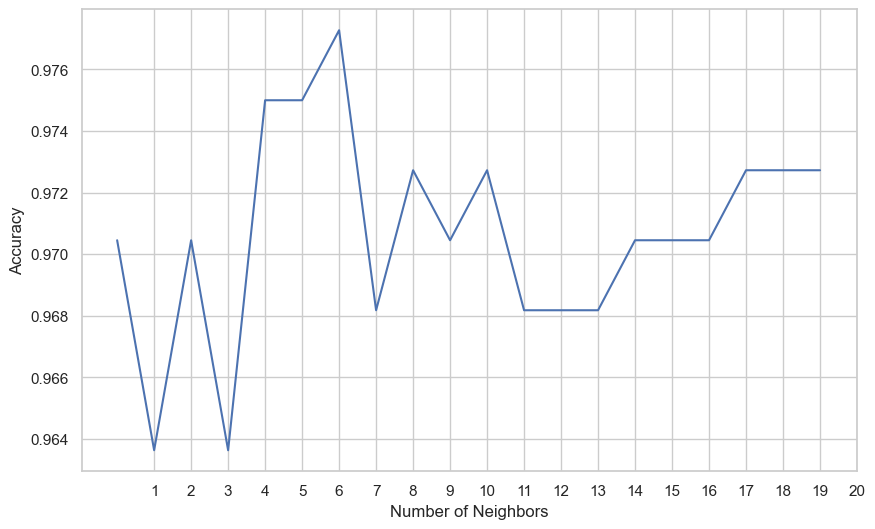

In [35]:
loc = np.arange(1,21, step = 1.0)
plt.figure(figsize = (10,6))
plt.plot(mean_acc)
plt.xticks(loc)
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

In [36]:
from sklearn.model_selection import GridSearchCV

### We will use three hyperparamters- n-neighbors, weights and metric:
* n_neighbors: Decide the best k based on the values we have computed earlier. 


* weights: Check whether adding weights to the data points is beneficial to the model or not. 'uniform' assigns no weight, while 'distance' weighs points by the inverse of their distances meaning nearer points will have more weight than the farther points. 


* metric: The distance metric to be used will calculating the similarity 

## Parameters

In [37]:
grid_params = {'n_neighbors' : [12,13,14,15,16,17,18],
              'weights' : ['uniform','distance'],
              'metric' : ['minkowski','euclidean','manhattan']}


In [38]:
gs = GridSearchCV(KNeighborsClassifier(),
                 grid_params,
                 verbose = 1,
                 cv = 3,
                 n_jobs = -1)

In [39]:
#fitting training data
g_res = gs.fit(x_train, y_train)

Fitting 3 folds for each of 42 candidates, totalling 126 fits


In [40]:
g_res.best_score_

0.9789756440743992

In [41]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'distance'}

# Using the best hyperparameters

In [42]:
knn_1 = KNeighborsClassifier(n_neighbors = 12,
                             weights = 'distance',
                            algorithm = 'brute',
                            metric = 'manhattan')

knn_1.fit(x_train, y_train)

KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=12,
                     weights='distance')

### Training & Testing accuracy after applying hyper parameter

In [43]:
#Train Accuracy
knn_train_accuracy = knn_1.score(x_train, y_train)
print("knn_train_accuracy = ", knn_train_accuracy)

#Test Accuracy
knn_test_accuracy = knn_1.score(x_test, y_test)
print("knn_test_accuracy = ", knn_test_accuracy)

knn_train_accuracy =  1.0
knn_test_accuracy =  0.9727272727272728


# 3.Decision Tree

In [44]:
# Decision Tree Classifier

DT = DecisionTreeClassifier() 
#Check accuracy using DT-parameters as well
#criterion = "entropy", random_state = 2, max_depth = 5
DT.fit(x_train, y_train)

DecisionTreeClassifier()

## Validation Scores

In [45]:
#Validation Scores

score = cross_val_score(DT, features, target, cv = 5)
print('Cross Validation score: ', score)

Cross Validation score:  [0.98636364 0.98409091 0.98636364 0.99318182 0.98409091]


## Train and Test Accuracy

In [46]:
#Train Accuracy
DT_train_accuracy = DT.score(x_train, y_train)
print("Decision Tree Train Accuracy = ", DT_train_accuracy)

#Test Accuracy
DT_test_Accuracy = DT.score(x_test, y_test)
print("Decision Tree Test Accuracy = ", DT_test_Accuracy)

Decision Tree Train Accuracy =  1.0
Decision Tree Test Accuracy =  0.9772727272727273


# Predictions

In [47]:
y_predicted_values = DT.predict(x_test)
y_true_actual = y_test

metrics_accuracy = metrics.accuracy_score(y_true_actual, y_predicted_values)
acc.append(metrics_accuracy)
model.append('Decision Tree')

print("Decision Tree Accuracy is ", metrics_accuracy)

Decision Tree Accuracy is  0.9772727272727273


# Classification Report

In [48]:
print("\n Classification Report:")
print(classification_report(y_true_actual, y_predicted_values))


 Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.93      0.88      0.90        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      0.93      0.91        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.91      0.91      0.91        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.90      0.95      0.92        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
  

# Confusion matrix

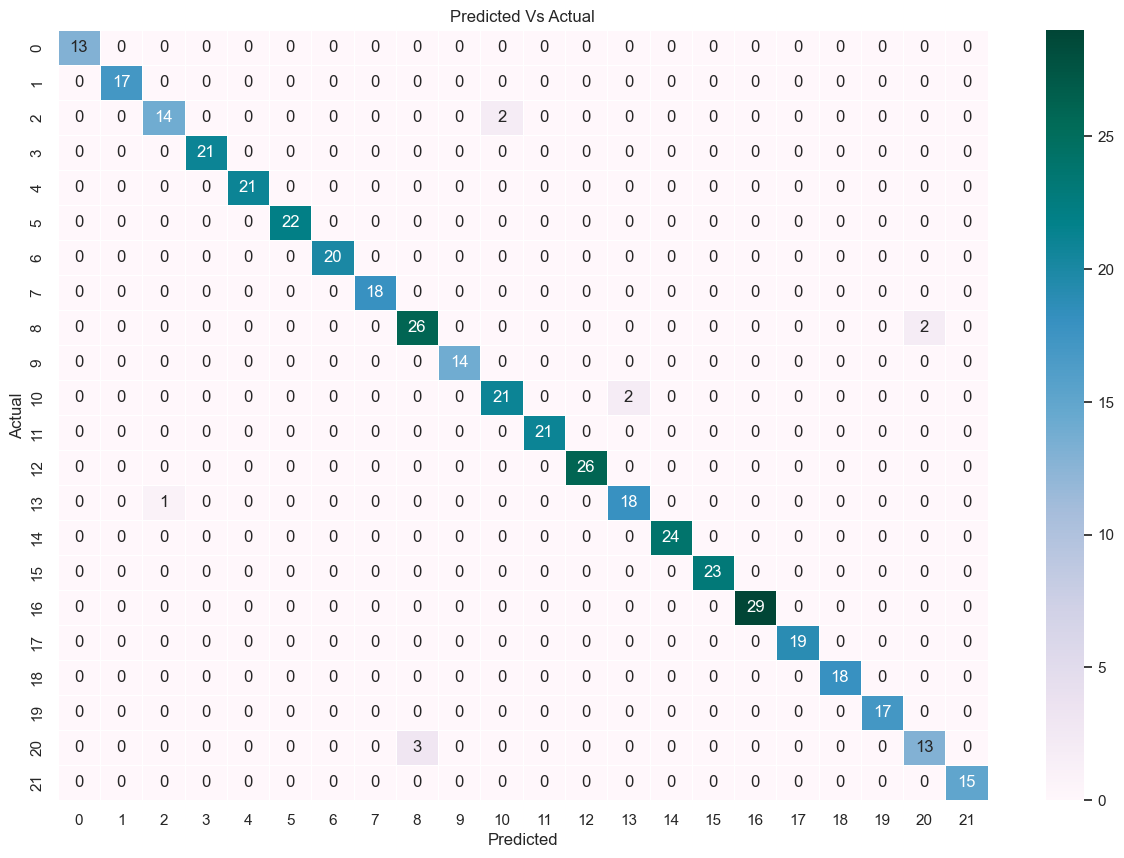

In [49]:
#confusion matrix

cm_DT = confusion_matrix(y_true_actual, y_predicted_values)

fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(cm_DT, annot = True, linewidth = 0.5, fmt = ".0f", cmap = 'PuBuGn' , ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Predicted Vs Actual")
plt.show()

# 4.Random Forest

In [50]:
#Random Forest Classifier

RF = RandomForestClassifier(n_estimators = 20, random_state = 0)
#Check accuracy using RF-Parameter
#n_estimators = 20, random_state = 0
RF.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

## Validation Scores

In [51]:
# Validation Scores

score = cross_val_score(RF, features, target, cv = 5)
print("Cross Validation Score : ", score)

Cross Validation Score :  [0.99772727 0.99545455 0.99772727 0.99318182 0.98863636]


## Train and Test Accuracy

In [52]:
#Train_accuracy
RF_train_accuracy = RF.score(x_train, y_train)
print("Random Forest Train Accuracy :", RF_train_accuracy)

#Test Accuracy
RF_test_accuracy = RF.score(x_test, y_test)
print("Random Forest Test Accuracy :", RF_test_accuracy)

Random Forest Train Accuracy : 1.0
Random Forest Test Accuracy : 0.990909090909091


# Predictions

In [53]:
y_predicted_values = RF.predict(x_test)
y_true_actual = y_test

metrics_accuracy = metrics.accuracy_score(y_true_actual, y_predicted_values)
acc.append(metrics_accuracy)
model.append('Random Forest')

print("Random Forest Accuracy is ", metrics_accuracy)

Random Forest Accuracy is  0.990909090909091


# Classification Report

In [54]:
print("\n Classification Report:")
print(classification_report(y_true_actual, y_predicted_values))


 Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
  

# Confusion matrix

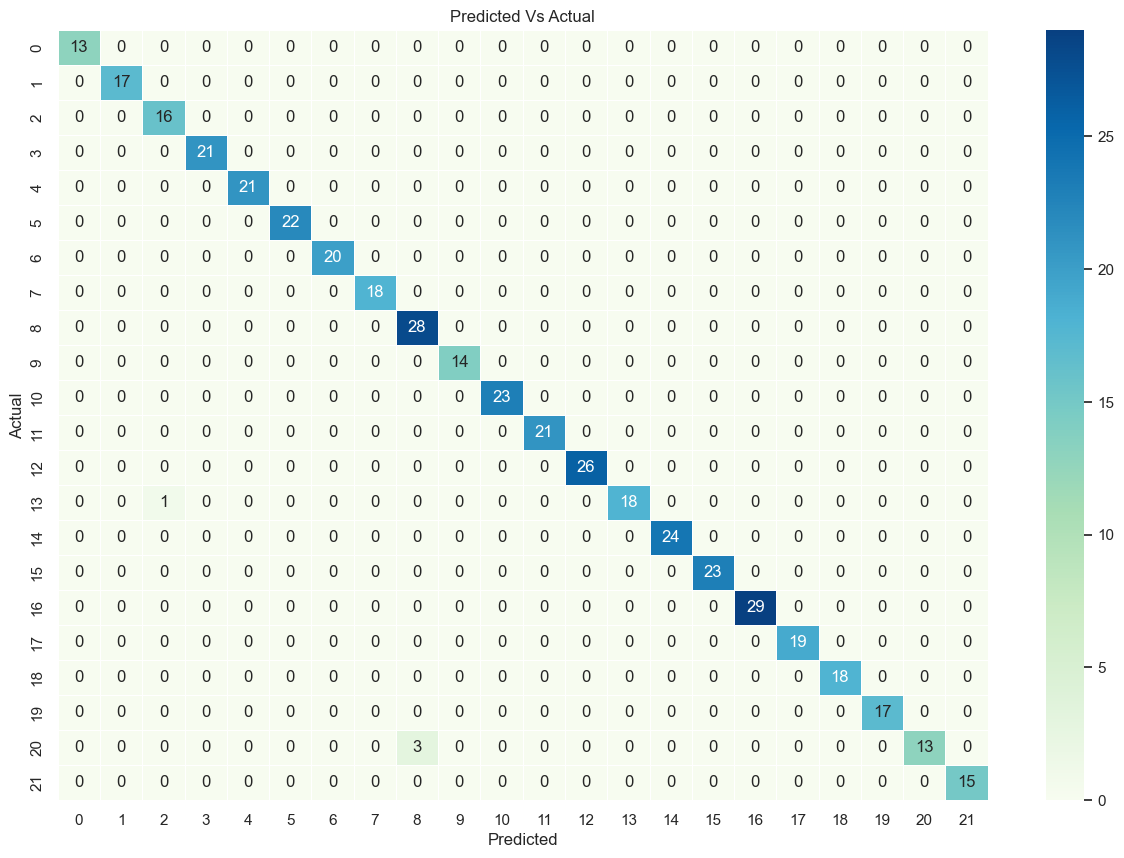

In [55]:
#confusion matrix

cm_RF = confusion_matrix(y_true_actual, y_predicted_values)

fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(cm_RF, annot = True, linewidth = 0.5, fmt = ".0f", cmap = 'GnBu' , ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Predicted Vs Actual")
plt.show()

# 5.Naive Bayes Classifier

In [56]:
#Naive Bayes Classifier : GaussianNB

NBC = GaussianNB()

NBC.fit(x_train, y_train)

GaussianNB()

## Validation Scores

In [57]:
score = cross_val_score(NBC, features, target, cv = 5)
print("Cross Validation Score: ", score)

Cross Validation Score:  [0.99772727 0.99545455 0.99545455 0.99545455 0.99090909]


## Train and Test Accuracy

In [58]:
#Train Accuracy
NBC_train_accuracy = NBC.score(x_train, y_train)
print("Naive Bayes Classifier Training Accuracy:", NBC_train_accuracy)

#Test Accuracy
NBC_test_accuracy = NBC.score(x_test, y_test)
print("Naive Bayes Classifier Test Accuracy: ", NBC_test_accuracy)

Naive Bayes Classifier Training Accuracy: 0.9960227272727272
Naive Bayes Classifier Test Accuracy:  0.990909090909091


# Predictions

In [59]:
y_predicted_values = NBC.predict(x_test)
y_true_actual = y_test

metrics_accuracy = metrics.accuracy_score(y_true_actual, y_predicted_values)
acc.append(metrics_accuracy)
model.append('Naive Bayes Classifier')

print("Naive Bayes Classifier Accuracy is ", metrics_accuracy)

Naive Bayes Classifier Accuracy is  0.990909090909091


# Classification Report

In [60]:
print("\n Classification Report:")
print(classification_report(y_true_actual, y_predicted_values))


 Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
  

# Confusion matrix

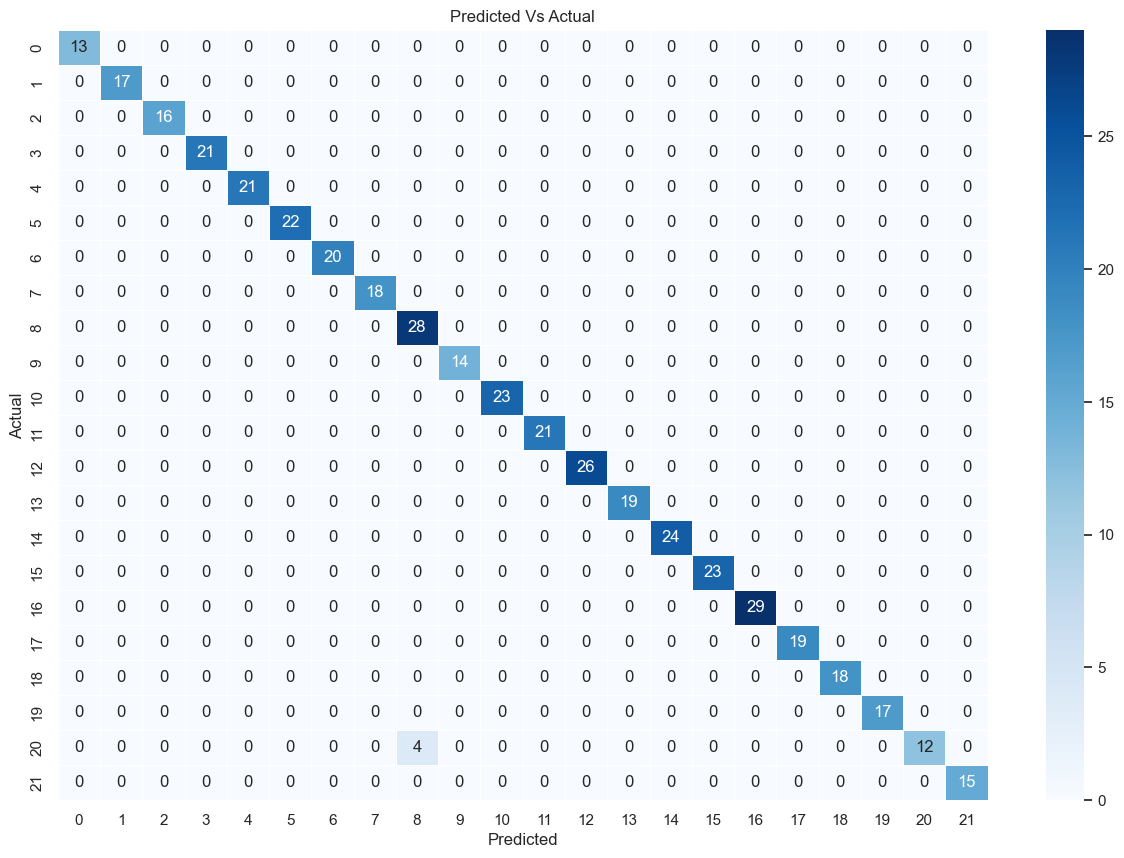

In [61]:
#confusion matrix

cm_NBC = confusion_matrix(y_true_actual, y_predicted_values)

fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(cm_NBC, annot = True, linewidth = 0.5, fmt = ".0f", cmap = 'Blues' , ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Predicted Vs Actual")
plt.show()

# 6.Extra Trees

In [62]:
#ExtraTrees Classifier

ET = ExtraTreesClassifier()
ET.fit(x_train, y_train)

ExtraTreesClassifier()

## Validation Scores

In [63]:
# validation score

score = cross_val_score(ET, features, target, cv = 5)
print("Cross Validation Score: ", score)

Cross Validation Score:  [0.99318182 0.99318182 0.99545455 0.99772727 0.98636364]


## Train and Test Accuracy

In [64]:
#Train Accuracy
ET_train_accuracy = ET.score(x_train, y_train)
print("Extra Tree Classifier Train Accuracy: ", ET_train_accuracy)

#Test Accuracy
ET_test_accuracy = ET.score(x_test, y_test)
print("Extra Tree Classifier Test Accuracy: ", ET_train_accuracy)


Extra Tree Classifier Train Accuracy:  1.0
Extra Tree Classifier Test Accuracy:  1.0


# Predictions

In [65]:
y_predicted_values = ET.predict(x_test)
y_true_actual = y_test

metrics_accuracy = metrics.accuracy_score(y_true_actual, y_predicted_values)
acc.append(metrics_accuracy)
model.append('Extra Trees Classifier')

print("Extra Tree Classifier Accuracy is ", metrics_accuracy)

Extra Tree Classifier Accuracy is  0.9886363636363636


# Classification Report

In [66]:
print("\n Classification Report:")
print(classification_report(y_true_actual, y_predicted_values))


 Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      0.96      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
  

# Confusion matrix

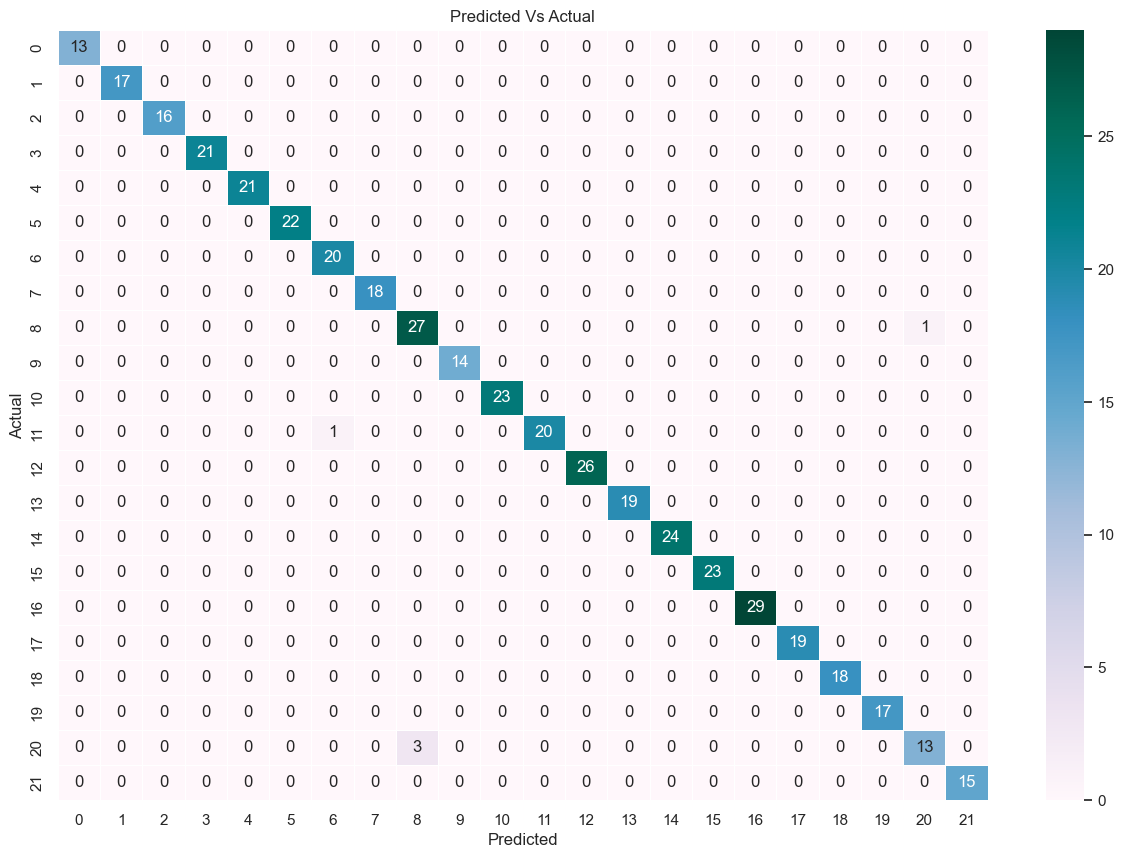

In [67]:
# confusion_matrix

cm_ET = confusion_matrix(y_true_actual, y_predicted_values)

fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(cm_ET, annot = True, linewidth = 0.5, fmt = ".0f", cmap = 'PuBuGn' , ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Predicted Vs Actual")
plt.show()

# 7.Support Vector Machines (SVM)

In [68]:
#Support Vector Machines (SVM)

svm = SVC()
svm.fit(x_train, y_train)

SVC()

## Validation Scores

In [69]:
#Validation score

score = cross_val_score(svm, features, target, cv = 5)
print("Cross Validation Score: ", score)

Cross Validation Score:  [0.98409091 0.97954545 0.97954545 0.97272727 0.975     ]


## Train and Test Accuracy

In [70]:
#Train Accuracy
svm_train_accuracy = svm.score(x_train, y_train)
print("Support Vector Machines Train Accuracy: ", svm_train_accuracy)

#Test Accuracy
svm_test_accuracy = svm.score(x_test, y_test)
print("Support Vector Machines Test Accuracy: ", svm_train_accuracy)


Support Vector Machines Train Accuracy:  0.9801136363636364
Support Vector Machines Test Accuracy:  0.9801136363636364


# Predictions

In [71]:
y_predicted_values = svm.predict(x_test)
y_true_actual = y_test

metrics_accuracy = metrics.accuracy_score(y_true_actual, y_predicted_values)
acc.append(metrics_accuracy)
model.append('Support Vector Machines')

print("Support Vector Machines Accuracy is ", metrics_accuracy)

Support Vector Machines Accuracy is  0.9772727272727273


# Classification Report

In [72]:
print("\n Classification Report:")
print(classification_report(y_true_actual, y_predicted_values))


 Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.85      1.00      0.92        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.92      1.00      0.96        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.84      0.91        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
  

# Confusion matrix

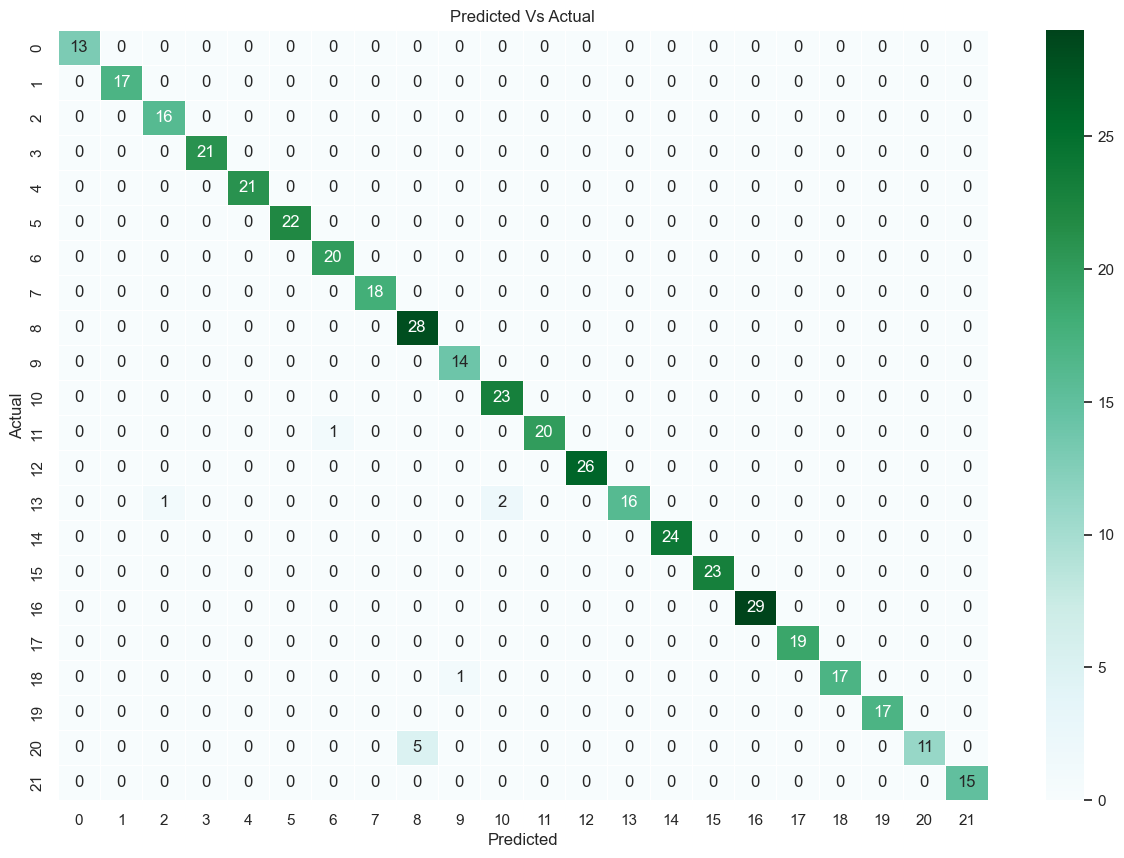

In [73]:
#confusion_matrix

cm_svm = confusion_matrix(y_true_actual, y_predicted_values)

fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(cm_svm, annot = True, linewidth = 0.5, fmt = ".0f", cmap = 'BuGn' , ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Predicted Vs Actual")
plt.show()

# 8.Neural Networks (Multi-layer Perceptron)

In [74]:
# Neural Networks (Multi-layer Perceptron)

NN_MLP = MLPClassifier()
NN_MLP.fit(x_train, y_train)

MLPClassifier()

## Validation Scores

In [75]:
#Validation score

score = cross_val_score(NN_MLP, features, target, cv = 5)
print("Cross Validation Score: ", score)

Cross Validation Score:  [0.95681818 0.96363636 0.96590909 0.96136364 0.95909091]


## Train & Test Accuracy

In [76]:
#Train Accuracy
NN_MLP_train_accuracy = NN_MLP.score(x_train, y_train)
print("Multi-layer Perceptron Train Accuracy: ", NN_MLP_train_accuracy)

NN_MLP_test_accuracy = NN_MLP.score(x_test, y_test)
print("Multi-layer Perceptron Train Accuracy: ", NN_MLP_test_accuracy)


Multi-layer Perceptron Train Accuracy:  0.9761363636363637
Multi-layer Perceptron Train Accuracy:  0.9681818181818181


# Predictions

In [77]:
y_predicted_values = NN_MLP.predict(x_test)
y_true_actual = y_test

metrics_accuracy = metrics.accuracy_score(y_true_actual, y_predicted_values)
acc.append(metrics_accuracy)
model.append('Neural Networks')

print("Multi-layer Perceptron Accuracy is ", metrics_accuracy)


Multi-layer Perceptron Accuracy is  0.9681818181818181


# Classification Report

In [78]:
print("\n Classification Report:")
print(classification_report(y_true_actual, y_predicted_values))


 Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.84      1.00      0.91        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.95      0.98        22
      cotton       0.87      1.00      0.93        20
      grapes       1.00      1.00      1.00        18
        jute       0.82      1.00      0.90        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.92      1.00      0.96        23
       maize       1.00      0.86      0.92        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.74      0.85        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
  

# Confusion matrix

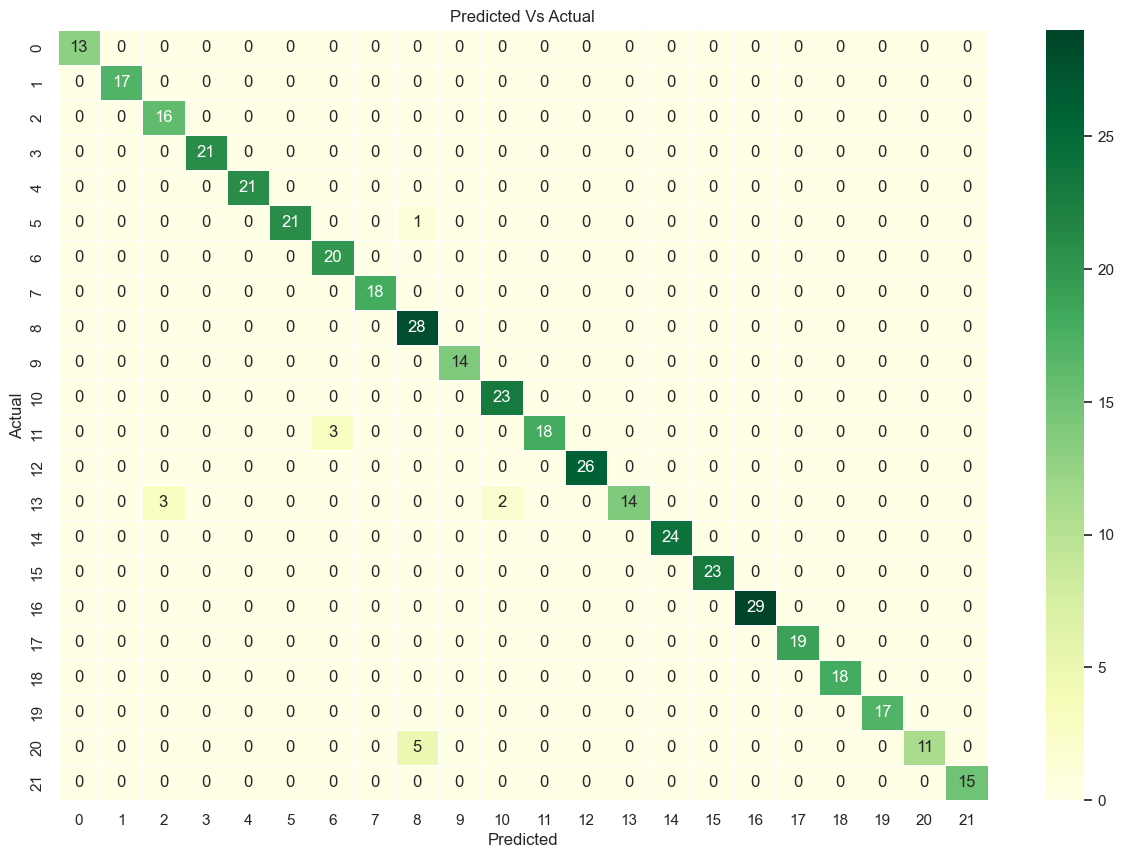

In [79]:
#confusion_matrix

cm_NN_MLP = confusion_matrix(y_true_actual, y_predicted_values)

fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(cm_NN_MLP, annot = True, linewidth = 0.5, fmt = ".0f", cmap = 'YlGn' , ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Predicted Vs Actual")
plt.show()

# 9.AdaBoost

In [80]:
#AdaBoost Classifier

ABC = AdaBoostClassifier()
ABC.fit(x_train, y_train)

AdaBoostClassifier()

## Validation Scores

In [81]:
#Validation score

score = cross_val_score(ABC, features, target, cv = 5)
print("Cross Validation Score: ", score)

Cross Validation Score:  [0.22727273 0.22727273 0.22727273 0.22727273 0.18181818]


## Train and Test Accuracy

In [82]:
#Train Accuracy
ABC_train_accuracy = ABC.score(x_train, y_train)
print("AdaBoost Classifier Train Accuracy: ", ABC_train_accuracy)

ABC_test_accuracy = ABC.score(x_test, y_test)
print("AdaBoost Classifier Train Accuracy: ", ABC_test_accuracy)

AdaBoost Classifier Train Accuracy:  0.23522727272727273
AdaBoost Classifier Train Accuracy:  0.19545454545454546


# Predictions

In [83]:
y_predicted_values = ABC.predict(x_test)
y_true_actual = y_test

metrics_accuracy = metrics.accuracy_score(y_true_actual, y_predicted_values)
acc.append(metrics_accuracy)
model.append('AdaBoost Classifier')

print("AdaBoost Classifier Accuracy is ", metrics_accuracy)

AdaBoost Classifier Accuracy is  0.19545454545454546


# Classification Report

In [84]:
print("\n Classification Report:")
print(classification_report(y_true_actual, y_predicted_values))


 Classification Report:
              precision    recall  f1-score   support

       apple       0.42      1.00      0.59        13
      banana       0.00      0.00      0.00        17
   blackgram       0.00      0.00      0.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.00      0.00      0.00        21
      coffee       0.00      0.00      0.00        22
      cotton       0.00      0.00      0.00        20
      grapes       0.00      0.00      0.00        18
        jute       0.00      0.00      0.00        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.00      0.00      0.00        23
       maize       0.00      0.00      0.00        21
       mango       0.00      0.00      0.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       0.00      0.00      0.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       0.00      0.00      0.00        29
  

# Confusion matrix

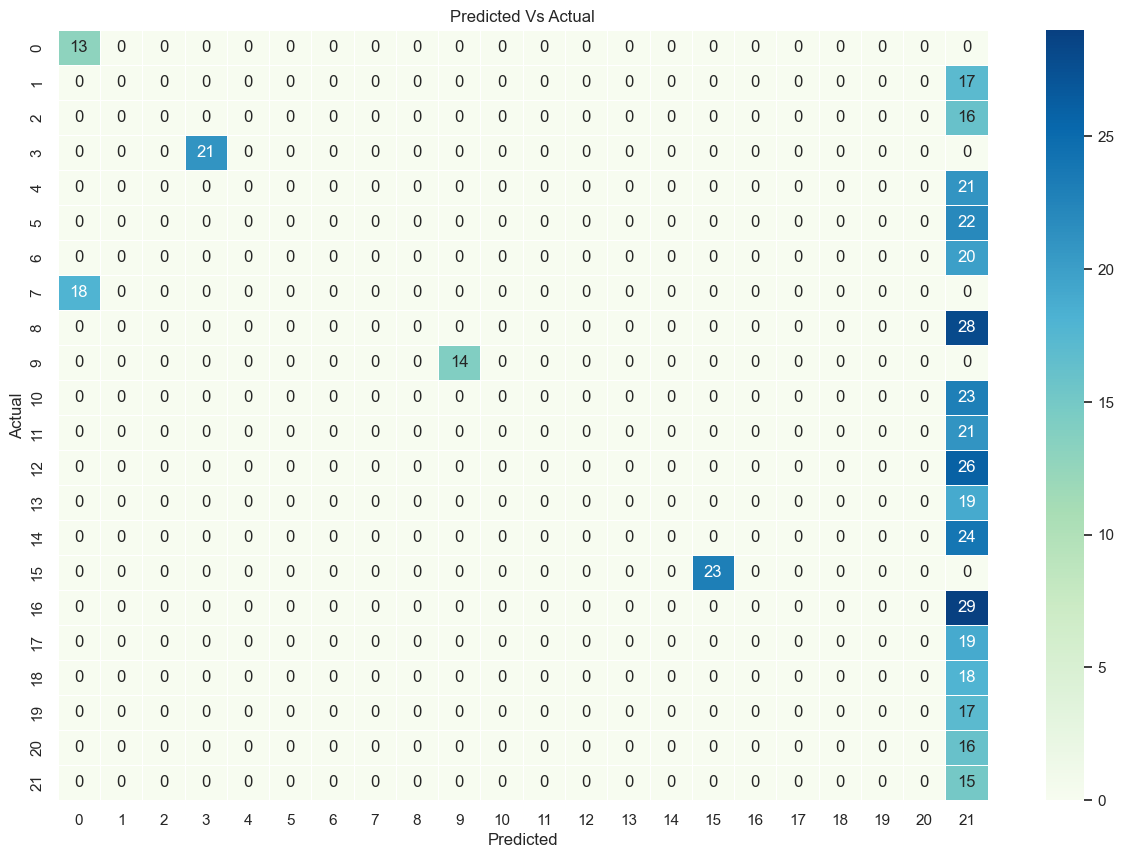

In [85]:
#confusion_matrix

cm_ABC = confusion_matrix(y_true_actual, y_predicted_values)

fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(cm_ABC, annot = True, linewidth = 0.5, fmt = ".0f", cmap = 'GnBu' , ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Predicted Vs Actual")
plt.show()

# 10.Light Gradient Boosting Machine (LGBM) 

In [86]:
#Light Gradient Boosting Machine (LGBM)

lgbm = lgbm.LGBMClassifier()
lgbm.fit(x_train, y_train)

LGBMClassifier()

## Validation Scores

In [87]:
#Validation score

score = cross_val_score(lgbm, features, target, cv = 5)
print("Cross Validation Score: ", score)

Cross Validation Score:  [0.99545455 0.98636364 0.99318182 0.98636364 0.98863636]


## Train & Test Accuracy

In [88]:
#Train Accuracy
lgbm_train_accuracy = lgbm.score(x_train, y_train)
print("Light Gradient Boosting Machine Train Accuracy: ", lgbm_train_accuracy)

#Test Accuracy
lgbm_test_accuracy = lgbm.score(x_test, y_test)
print("Light Gradient Boosting Machine Test Accuracy: ", lgbm_test_accuracy)


Light Gradient Boosting Machine Train Accuracy:  1.0
Light Gradient Boosting Machine Test Accuracy:  0.9931818181818182


# Predictions

In [89]:
y_predicted_values = lgbm.predict(x_test)
y_true_actual = y_test

metrics_accuracy = metrics.accuracy_score(y_true_actual, y_predicted_values)
acc.append(metrics_accuracy)
model.append('Light Gradient Boosting Machine')

print("Light Gradient Boosting Machine Accuracy is ", metrics_accuracy)

Light Gradient Boosting Machine Accuracy is  0.9931818181818182


# Classification Report

In [90]:
print("\n Classification Report:")
print(classification_report(y_true_actual, y_predicted_values))


 Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.96      0.93      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
  

# Confusion matrix

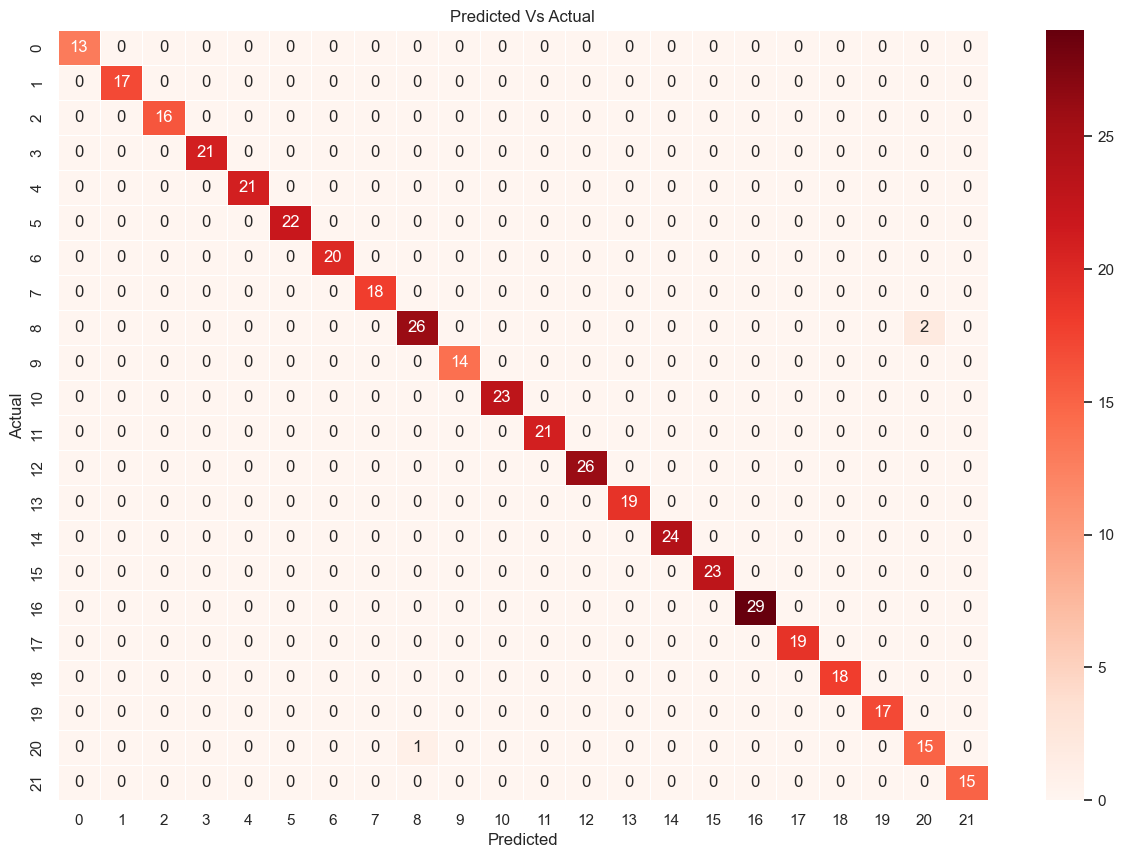

In [91]:
#confusion_matrix

cm_lgbm = confusion_matrix(y_true_actual, y_predicted_values)

fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(cm_lgbm, annot = True, linewidth = 0.5, fmt = ".0f", cmap = 'Reds' , ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Predicted Vs Actual")
plt.show()

# 11.CatBoost


In [92]:
#CatBoost Classifier

cat = CatBoostClassifier()
cat.fit(x_train, y_train)

Learning rate set to 0.081441
0:	learn: 2.6429789	total: 174ms	remaining: 2m 53s
1:	learn: 2.2451642	total: 198ms	remaining: 1m 38s
2:	learn: 1.9785439	total: 224ms	remaining: 1m 14s
3:	learn: 1.7760531	total: 249ms	remaining: 1m 1s
4:	learn: 1.5866594	total: 273ms	remaining: 54.4s
5:	learn: 1.4500721	total: 298ms	remaining: 49.4s
6:	learn: 1.3088470	total: 323ms	remaining: 45.8s
7:	learn: 1.2076979	total: 347ms	remaining: 43s
8:	learn: 1.1079196	total: 371ms	remaining: 40.8s
9:	learn: 1.0225710	total: 395ms	remaining: 39.1s
10:	learn: 0.9469835	total: 419ms	remaining: 37.7s
11:	learn: 0.8843799	total: 444ms	remaining: 36.6s
12:	learn: 0.8222585	total: 470ms	remaining: 35.7s
13:	learn: 0.7653332	total: 494ms	remaining: 34.8s
14:	learn: 0.7146539	total: 520ms	remaining: 34.1s
15:	learn: 0.6689534	total: 548ms	remaining: 33.7s
16:	learn: 0.6276062	total: 574ms	remaining: 33.2s
17:	learn: 0.5945973	total: 599ms	remaining: 32.7s
18:	learn: 0.5610818	total: 627ms	remaining: 32.4s
19:	learn:

167:	learn: 0.0296937	total: 4.23s	remaining: 21s
168:	learn: 0.0293937	total: 4.26s	remaining: 20.9s
169:	learn: 0.0291868	total: 4.29s	remaining: 20.9s
170:	learn: 0.0289953	total: 4.32s	remaining: 20.9s
171:	learn: 0.0287904	total: 4.34s	remaining: 20.9s
172:	learn: 0.0285995	total: 4.37s	remaining: 20.9s
173:	learn: 0.0283984	total: 4.4s	remaining: 20.9s
174:	learn: 0.0281525	total: 4.42s	remaining: 20.9s
175:	learn: 0.0280079	total: 4.45s	remaining: 20.8s
176:	learn: 0.0278586	total: 4.47s	remaining: 20.8s
177:	learn: 0.0277022	total: 4.5s	remaining: 20.8s
178:	learn: 0.0274223	total: 4.52s	remaining: 20.7s
179:	learn: 0.0272663	total: 4.54s	remaining: 20.7s
180:	learn: 0.0271154	total: 4.57s	remaining: 20.7s
181:	learn: 0.0268672	total: 4.59s	remaining: 20.6s
182:	learn: 0.0266981	total: 4.61s	remaining: 20.6s
183:	learn: 0.0265876	total: 4.64s	remaining: 20.6s
184:	learn: 0.0264532	total: 4.66s	remaining: 20.5s
185:	learn: 0.0263342	total: 4.68s	remaining: 20.5s
186:	learn: 0.02

326:	learn: 0.0133447	total: 7.92s	remaining: 16.3s
327:	learn: 0.0133079	total: 7.94s	remaining: 16.3s
328:	learn: 0.0132717	total: 7.97s	remaining: 16.3s
329:	learn: 0.0132345	total: 7.99s	remaining: 16.2s
330:	learn: 0.0131766	total: 8.01s	remaining: 16.2s
331:	learn: 0.0130862	total: 8.04s	remaining: 16.2s
332:	learn: 0.0130479	total: 8.06s	remaining: 16.1s
333:	learn: 0.0130081	total: 8.08s	remaining: 16.1s
334:	learn: 0.0129570	total: 8.1s	remaining: 16.1s
335:	learn: 0.0129083	total: 8.13s	remaining: 16.1s
336:	learn: 0.0128685	total: 8.15s	remaining: 16s
337:	learn: 0.0128226	total: 8.17s	remaining: 16s
338:	learn: 0.0127908	total: 8.19s	remaining: 16s
339:	learn: 0.0127496	total: 8.22s	remaining: 15.9s
340:	learn: 0.0126866	total: 8.24s	remaining: 15.9s
341:	learn: 0.0126296	total: 8.26s	remaining: 15.9s
342:	learn: 0.0125836	total: 8.28s	remaining: 15.9s
343:	learn: 0.0125438	total: 8.3s	remaining: 15.8s
344:	learn: 0.0124951	total: 8.33s	remaining: 15.8s
345:	learn: 0.012468

489:	learn: 0.0085007	total: 11.6s	remaining: 12.1s
490:	learn: 0.0084874	total: 11.6s	remaining: 12s
491:	learn: 0.0084761	total: 11.6s	remaining: 12s
492:	learn: 0.0084629	total: 11.7s	remaining: 12s
493:	learn: 0.0084302	total: 11.7s	remaining: 12s
494:	learn: 0.0084137	total: 11.7s	remaining: 11.9s
495:	learn: 0.0083865	total: 11.7s	remaining: 11.9s
496:	learn: 0.0083635	total: 11.7s	remaining: 11.9s
497:	learn: 0.0083483	total: 11.8s	remaining: 11.9s
498:	learn: 0.0083296	total: 11.8s	remaining: 11.8s
499:	learn: 0.0083061	total: 11.8s	remaining: 11.8s
500:	learn: 0.0082872	total: 11.8s	remaining: 11.8s
501:	learn: 0.0082668	total: 11.9s	remaining: 11.8s
502:	learn: 0.0082477	total: 11.9s	remaining: 11.7s
503:	learn: 0.0082233	total: 11.9s	remaining: 11.7s
504:	learn: 0.0081999	total: 11.9s	remaining: 11.7s
505:	learn: 0.0081840	total: 11.9s	remaining: 11.7s
506:	learn: 0.0081751	total: 12s	remaining: 11.6s
507:	learn: 0.0081609	total: 12s	remaining: 11.6s
508:	learn: 0.0081463	to

651:	learn: 0.0061904	total: 15.4s	remaining: 8.2s
652:	learn: 0.0061807	total: 15.4s	remaining: 8.18s
653:	learn: 0.0061730	total: 15.4s	remaining: 8.15s
654:	learn: 0.0061639	total: 15.4s	remaining: 8.13s
655:	learn: 0.0061553	total: 15.5s	remaining: 8.11s
656:	learn: 0.0061459	total: 15.5s	remaining: 8.08s
657:	learn: 0.0061353	total: 15.5s	remaining: 8.06s
658:	learn: 0.0061276	total: 15.5s	remaining: 8.03s
659:	learn: 0.0061056	total: 15.5s	remaining: 8.01s
660:	learn: 0.0060980	total: 15.6s	remaining: 7.98s
661:	learn: 0.0060849	total: 15.6s	remaining: 7.96s
662:	learn: 0.0060774	total: 15.6s	remaining: 7.93s
663:	learn: 0.0060632	total: 15.6s	remaining: 7.91s
664:	learn: 0.0060556	total: 15.7s	remaining: 7.89s
665:	learn: 0.0060499	total: 15.7s	remaining: 7.86s
666:	learn: 0.0060403	total: 15.7s	remaining: 7.84s
667:	learn: 0.0060262	total: 15.7s	remaining: 7.81s
668:	learn: 0.0060143	total: 15.7s	remaining: 7.79s
669:	learn: 0.0060016	total: 15.8s	remaining: 7.77s
670:	learn: 0

818:	learn: 0.0048023	total: 19.2s	remaining: 4.24s
819:	learn: 0.0047908	total: 19.2s	remaining: 4.21s
820:	learn: 0.0047863	total: 19.2s	remaining: 4.19s
821:	learn: 0.0047813	total: 19.2s	remaining: 4.17s
822:	learn: 0.0047768	total: 19.3s	remaining: 4.14s
823:	learn: 0.0047674	total: 19.3s	remaining: 4.12s
824:	learn: 0.0047613	total: 19.3s	remaining: 4.1s
825:	learn: 0.0047559	total: 19.3s	remaining: 4.07s
826:	learn: 0.0047487	total: 19.4s	remaining: 4.05s
827:	learn: 0.0047441	total: 19.4s	remaining: 4.03s
828:	learn: 0.0047382	total: 19.4s	remaining: 4s
829:	learn: 0.0047333	total: 19.4s	remaining: 3.98s
830:	learn: 0.0047270	total: 19.5s	remaining: 3.96s
831:	learn: 0.0047189	total: 19.5s	remaining: 3.93s
832:	learn: 0.0047137	total: 19.5s	remaining: 3.91s
833:	learn: 0.0047057	total: 19.5s	remaining: 3.89s
834:	learn: 0.0047014	total: 19.6s	remaining: 3.86s
835:	learn: 0.0046970	total: 19.6s	remaining: 3.84s
836:	learn: 0.0046920	total: 19.6s	remaining: 3.82s
837:	learn: 0.00

978:	learn: 0.0039433	total: 22.8s	remaining: 490ms
979:	learn: 0.0039393	total: 22.9s	remaining: 467ms
980:	learn: 0.0039358	total: 22.9s	remaining: 443ms
981:	learn: 0.0039307	total: 22.9s	remaining: 420ms
982:	learn: 0.0039264	total: 22.9s	remaining: 397ms
983:	learn: 0.0039212	total: 23s	remaining: 373ms
984:	learn: 0.0039183	total: 23s	remaining: 350ms
985:	learn: 0.0039156	total: 23s	remaining: 327ms
986:	learn: 0.0039114	total: 23s	remaining: 303ms
987:	learn: 0.0039072	total: 23s	remaining: 280ms
988:	learn: 0.0039032	total: 23.1s	remaining: 257ms
989:	learn: 0.0038988	total: 23.1s	remaining: 233ms
990:	learn: 0.0038949	total: 23.1s	remaining: 210ms
991:	learn: 0.0038886	total: 23.1s	remaining: 187ms
992:	learn: 0.0038840	total: 23.2s	remaining: 163ms
993:	learn: 0.0038766	total: 23.2s	remaining: 140ms
994:	learn: 0.0038736	total: 23.2s	remaining: 117ms
995:	learn: 0.0038694	total: 23.2s	remaining: 93.3ms
996:	learn: 0.0038645	total: 23.2s	remaining: 69.9ms
997:	learn: 0.003859

## Validation Scores

In [93]:
#Validation score

score = cross_val_score(cat, features, target, cv = 2)
print("Cross Validation Score: ", score)

Learning rate set to 0.079512
0:	learn: 2.6280423	total: 21.7ms	remaining: 21.7s
1:	learn: 2.3067776	total: 41.1ms	remaining: 20.5s
2:	learn: 2.0613799	total: 61.8ms	remaining: 20.5s
3:	learn: 1.8491552	total: 83.8ms	remaining: 20.9s
4:	learn: 1.6916521	total: 105ms	remaining: 21s
5:	learn: 1.5576911	total: 127ms	remaining: 21s
6:	learn: 1.4284053	total: 149ms	remaining: 21.1s
7:	learn: 1.3188166	total: 170ms	remaining: 21s
8:	learn: 1.2175261	total: 190ms	remaining: 21s
9:	learn: 1.1328850	total: 211ms	remaining: 20.9s
10:	learn: 1.0517541	total: 233ms	remaining: 21s
11:	learn: 0.9881262	total: 254ms	remaining: 20.9s
12:	learn: 0.9212559	total: 275ms	remaining: 20.9s
13:	learn: 0.8686413	total: 296ms	remaining: 20.8s
14:	learn: 0.8165681	total: 316ms	remaining: 20.8s
15:	learn: 0.7736846	total: 339ms	remaining: 20.9s
16:	learn: 0.7307320	total: 361ms	remaining: 20.8s
17:	learn: 0.6943080	total: 381ms	remaining: 20.8s
18:	learn: 0.6570685	total: 401ms	remaining: 20.7s
19:	learn: 0.6198

166:	learn: 0.0401154	total: 3.53s	remaining: 17.6s
167:	learn: 0.0398243	total: 3.55s	remaining: 17.6s
168:	learn: 0.0395294	total: 3.57s	remaining: 17.5s
169:	learn: 0.0392476	total: 3.59s	remaining: 17.5s
170:	learn: 0.0388819	total: 3.61s	remaining: 17.5s
171:	learn: 0.0386651	total: 3.63s	remaining: 17.5s
172:	learn: 0.0384736	total: 3.65s	remaining: 17.4s
173:	learn: 0.0381100	total: 3.67s	remaining: 17.4s
174:	learn: 0.0378387	total: 3.69s	remaining: 17.4s
175:	learn: 0.0376016	total: 3.71s	remaining: 17.4s
176:	learn: 0.0372727	total: 3.73s	remaining: 17.3s
177:	learn: 0.0369382	total: 3.75s	remaining: 17.3s
178:	learn: 0.0367541	total: 3.77s	remaining: 17.3s
179:	learn: 0.0365276	total: 3.79s	remaining: 17.3s
180:	learn: 0.0362624	total: 3.81s	remaining: 17.2s
181:	learn: 0.0359269	total: 3.83s	remaining: 17.2s
182:	learn: 0.0357035	total: 3.85s	remaining: 17.2s
183:	learn: 0.0354756	total: 3.87s	remaining: 17.2s
184:	learn: 0.0352444	total: 3.89s	remaining: 17.2s
185:	learn: 

327:	learn: 0.0176123	total: 6.93s	remaining: 14.2s
328:	learn: 0.0175250	total: 6.95s	remaining: 14.2s
329:	learn: 0.0174818	total: 6.98s	remaining: 14.2s
330:	learn: 0.0174281	total: 7s	remaining: 14.1s
331:	learn: 0.0173831	total: 7.02s	remaining: 14.1s
332:	learn: 0.0173285	total: 7.04s	remaining: 14.1s
333:	learn: 0.0172619	total: 7.07s	remaining: 14.1s
334:	learn: 0.0172063	total: 7.09s	remaining: 14.1s
335:	learn: 0.0171202	total: 7.11s	remaining: 14.1s
336:	learn: 0.0170619	total: 7.13s	remaining: 14s
337:	learn: 0.0170122	total: 7.16s	remaining: 14s
338:	learn: 0.0169604	total: 7.18s	remaining: 14s
339:	learn: 0.0169117	total: 7.2s	remaining: 14s
340:	learn: 0.0168652	total: 7.22s	remaining: 14s
341:	learn: 0.0167824	total: 7.24s	remaining: 13.9s
342:	learn: 0.0167084	total: 7.26s	remaining: 13.9s
343:	learn: 0.0166526	total: 7.29s	remaining: 13.9s
344:	learn: 0.0165999	total: 7.31s	remaining: 13.9s
345:	learn: 0.0165648	total: 7.33s	remaining: 13.9s
346:	learn: 0.0165091	tota

493:	learn: 0.0109755	total: 10.6s	remaining: 10.9s
494:	learn: 0.0109614	total: 10.6s	remaining: 10.8s
495:	learn: 0.0109358	total: 10.6s	remaining: 10.8s
496:	learn: 0.0109127	total: 10.7s	remaining: 10.8s
497:	learn: 0.0108769	total: 10.7s	remaining: 10.8s
498:	learn: 0.0108483	total: 10.7s	remaining: 10.8s
499:	learn: 0.0108167	total: 10.7s	remaining: 10.7s
500:	learn: 0.0108019	total: 10.8s	remaining: 10.7s
501:	learn: 0.0107824	total: 10.8s	remaining: 10.7s
502:	learn: 0.0107646	total: 10.8s	remaining: 10.7s
503:	learn: 0.0107375	total: 10.8s	remaining: 10.6s
504:	learn: 0.0107148	total: 10.8s	remaining: 10.6s
505:	learn: 0.0106988	total: 10.9s	remaining: 10.6s
506:	learn: 0.0106805	total: 10.9s	remaining: 10.6s
507:	learn: 0.0106551	total: 10.9s	remaining: 10.6s
508:	learn: 0.0106279	total: 10.9s	remaining: 10.5s
509:	learn: 0.0105998	total: 11s	remaining: 10.5s
510:	learn: 0.0105825	total: 11s	remaining: 10.5s
511:	learn: 0.0105632	total: 11s	remaining: 10.5s
512:	learn: 0.0105

659:	learn: 0.0079020	total: 14.5s	remaining: 7.47s
660:	learn: 0.0078911	total: 14.5s	remaining: 7.45s
661:	learn: 0.0078828	total: 14.5s	remaining: 7.42s
662:	learn: 0.0078675	total: 14.6s	remaining: 7.4s
663:	learn: 0.0078583	total: 14.6s	remaining: 7.38s
664:	learn: 0.0078464	total: 14.6s	remaining: 7.36s
665:	learn: 0.0078337	total: 14.6s	remaining: 7.34s
666:	learn: 0.0078202	total: 14.7s	remaining: 7.32s
667:	learn: 0.0078058	total: 14.7s	remaining: 7.29s
668:	learn: 0.0077866	total: 14.7s	remaining: 7.27s
669:	learn: 0.0077779	total: 14.7s	remaining: 7.25s
670:	learn: 0.0077660	total: 14.7s	remaining: 7.22s
671:	learn: 0.0077534	total: 14.8s	remaining: 7.2s
672:	learn: 0.0077399	total: 14.8s	remaining: 7.18s
673:	learn: 0.0077270	total: 14.8s	remaining: 7.16s
674:	learn: 0.0077088	total: 14.8s	remaining: 7.13s
675:	learn: 0.0076990	total: 14.8s	remaining: 7.11s
676:	learn: 0.0076856	total: 14.9s	remaining: 7.09s
677:	learn: 0.0076719	total: 14.9s	remaining: 7.07s
678:	learn: 0.

820:	learn: 0.0062040	total: 18s	remaining: 3.92s
821:	learn: 0.0061961	total: 18s	remaining: 3.89s
822:	learn: 0.0061903	total: 18s	remaining: 3.87s
823:	learn: 0.0061822	total: 18s	remaining: 3.85s
824:	learn: 0.0061746	total: 18s	remaining: 3.83s
825:	learn: 0.0061697	total: 18.1s	remaining: 3.81s
826:	learn: 0.0061575	total: 18.1s	remaining: 3.78s
827:	learn: 0.0061536	total: 18.1s	remaining: 3.76s
828:	learn: 0.0061426	total: 18.1s	remaining: 3.74s
829:	learn: 0.0061313	total: 18.1s	remaining: 3.72s
830:	learn: 0.0061266	total: 18.2s	remaining: 3.69s
831:	learn: 0.0061205	total: 18.2s	remaining: 3.67s
832:	learn: 0.0061135	total: 18.2s	remaining: 3.65s
833:	learn: 0.0061097	total: 18.2s	remaining: 3.63s
834:	learn: 0.0061047	total: 18.3s	remaining: 3.61s
835:	learn: 0.0060942	total: 18.3s	remaining: 3.59s
836:	learn: 0.0060868	total: 18.3s	remaining: 3.56s
837:	learn: 0.0060772	total: 18.3s	remaining: 3.54s
838:	learn: 0.0060674	total: 18.3s	remaining: 3.52s
839:	learn: 0.0060560	

979:	learn: 0.0051467	total: 21.4s	remaining: 437ms
980:	learn: 0.0051421	total: 21.4s	remaining: 415ms
981:	learn: 0.0051383	total: 21.4s	remaining: 393ms
982:	learn: 0.0051322	total: 21.5s	remaining: 371ms
983:	learn: 0.0051272	total: 21.5s	remaining: 349ms
984:	learn: 0.0051224	total: 21.5s	remaining: 328ms
985:	learn: 0.0051183	total: 21.5s	remaining: 306ms
986:	learn: 0.0051076	total: 21.6s	remaining: 284ms
987:	learn: 0.0051013	total: 21.6s	remaining: 262ms
988:	learn: 0.0050948	total: 21.6s	remaining: 240ms
989:	learn: 0.0050921	total: 21.6s	remaining: 218ms
990:	learn: 0.0050851	total: 21.6s	remaining: 197ms
991:	learn: 0.0050796	total: 21.7s	remaining: 175ms
992:	learn: 0.0050754	total: 21.7s	remaining: 153ms
993:	learn: 0.0050708	total: 21.7s	remaining: 131ms
994:	learn: 0.0050671	total: 21.7s	remaining: 109ms
995:	learn: 0.0050588	total: 21.7s	remaining: 87.3ms
996:	learn: 0.0050551	total: 21.8s	remaining: 65.5ms
997:	learn: 0.0050512	total: 21.8s	remaining: 43.7ms
998:	lear

141:	learn: 0.0487880	total: 3.12s	remaining: 18.8s
142:	learn: 0.0480469	total: 3.14s	remaining: 18.8s
143:	learn: 0.0476052	total: 3.16s	remaining: 18.8s
144:	learn: 0.0471050	total: 3.18s	remaining: 18.7s
145:	learn: 0.0466157	total: 3.2s	remaining: 18.7s
146:	learn: 0.0462019	total: 3.22s	remaining: 18.7s
147:	learn: 0.0457375	total: 3.24s	remaining: 18.6s
148:	learn: 0.0451780	total: 3.26s	remaining: 18.6s
149:	learn: 0.0448944	total: 3.28s	remaining: 18.6s
150:	learn: 0.0445988	total: 3.3s	remaining: 18.6s
151:	learn: 0.0442942	total: 3.32s	remaining: 18.5s
152:	learn: 0.0439160	total: 3.34s	remaining: 18.5s
153:	learn: 0.0435031	total: 3.37s	remaining: 18.5s
154:	learn: 0.0432524	total: 3.39s	remaining: 18.5s
155:	learn: 0.0428486	total: 3.41s	remaining: 18.4s
156:	learn: 0.0425088	total: 3.43s	remaining: 18.4s
157:	learn: 0.0421325	total: 3.45s	remaining: 18.4s
158:	learn: 0.0418390	total: 3.47s	remaining: 18.3s
159:	learn: 0.0415723	total: 3.49s	remaining: 18.3s
160:	learn: 0.

301:	learn: 0.0191259	total: 6.59s	remaining: 15.2s
302:	learn: 0.0190144	total: 6.61s	remaining: 15.2s
303:	learn: 0.0189326	total: 6.63s	remaining: 15.2s
304:	learn: 0.0188741	total: 6.66s	remaining: 15.2s
305:	learn: 0.0187716	total: 6.68s	remaining: 15.1s
306:	learn: 0.0186596	total: 6.7s	remaining: 15.1s
307:	learn: 0.0186016	total: 6.72s	remaining: 15.1s
308:	learn: 0.0185255	total: 6.74s	remaining: 15.1s
309:	learn: 0.0184634	total: 6.76s	remaining: 15s
310:	learn: 0.0184193	total: 6.78s	remaining: 15s
311:	learn: 0.0183713	total: 6.8s	remaining: 15s
312:	learn: 0.0182696	total: 6.82s	remaining: 15s
313:	learn: 0.0182308	total: 6.84s	remaining: 14.9s
314:	learn: 0.0181516	total: 6.86s	remaining: 14.9s
315:	learn: 0.0180784	total: 6.89s	remaining: 14.9s
316:	learn: 0.0180132	total: 6.91s	remaining: 14.9s
317:	learn: 0.0179238	total: 6.93s	remaining: 14.9s
318:	learn: 0.0178434	total: 6.96s	remaining: 14.9s
319:	learn: 0.0177936	total: 6.99s	remaining: 14.9s
320:	learn: 0.0177095	

464:	learn: 0.0114838	total: 10.1s	remaining: 11.6s
465:	learn: 0.0114577	total: 10.1s	remaining: 11.6s
466:	learn: 0.0114337	total: 10.1s	remaining: 11.6s
467:	learn: 0.0114058	total: 10.2s	remaining: 11.6s
468:	learn: 0.0113806	total: 10.2s	remaining: 11.5s
469:	learn: 0.0113705	total: 10.2s	remaining: 11.5s
470:	learn: 0.0113233	total: 10.2s	remaining: 11.5s
471:	learn: 0.0113073	total: 10.2s	remaining: 11.5s
472:	learn: 0.0112888	total: 10.3s	remaining: 11.4s
473:	learn: 0.0112619	total: 10.3s	remaining: 11.4s
474:	learn: 0.0112261	total: 10.3s	remaining: 11.4s
475:	learn: 0.0111866	total: 10.3s	remaining: 11.4s
476:	learn: 0.0111621	total: 10.4s	remaining: 11.4s
477:	learn: 0.0111261	total: 10.4s	remaining: 11.3s
478:	learn: 0.0110790	total: 10.4s	remaining: 11.3s
479:	learn: 0.0110612	total: 10.4s	remaining: 11.3s
480:	learn: 0.0110246	total: 10.4s	remaining: 11.3s
481:	learn: 0.0110058	total: 10.5s	remaining: 11.3s
482:	learn: 0.0109870	total: 10.5s	remaining: 11.2s
483:	learn: 

626:	learn: 0.0080366	total: 13.5s	remaining: 8.05s
627:	learn: 0.0080284	total: 13.6s	remaining: 8.03s
628:	learn: 0.0080135	total: 13.6s	remaining: 8.01s
629:	learn: 0.0079999	total: 13.6s	remaining: 7.99s
630:	learn: 0.0079793	total: 13.6s	remaining: 7.96s
631:	learn: 0.0079677	total: 13.6s	remaining: 7.94s
632:	learn: 0.0079562	total: 13.7s	remaining: 7.92s
633:	learn: 0.0079469	total: 13.7s	remaining: 7.89s
634:	learn: 0.0079152	total: 13.7s	remaining: 7.87s
635:	learn: 0.0079025	total: 13.7s	remaining: 7.85s
636:	learn: 0.0078905	total: 13.7s	remaining: 7.83s
637:	learn: 0.0078829	total: 13.8s	remaining: 7.81s
638:	learn: 0.0078721	total: 13.8s	remaining: 7.79s
639:	learn: 0.0078552	total: 13.8s	remaining: 7.76s
640:	learn: 0.0078379	total: 13.8s	remaining: 7.74s
641:	learn: 0.0078280	total: 13.8s	remaining: 7.72s
642:	learn: 0.0078174	total: 13.9s	remaining: 7.7s
643:	learn: 0.0078005	total: 13.9s	remaining: 7.68s
644:	learn: 0.0077807	total: 13.9s	remaining: 7.66s
645:	learn: 0

789:	learn: 0.0061688	total: 17s	remaining: 4.52s
790:	learn: 0.0061599	total: 17s	remaining: 4.5s
791:	learn: 0.0061536	total: 17s	remaining: 4.47s
792:	learn: 0.0061468	total: 17.1s	remaining: 4.45s
793:	learn: 0.0061373	total: 17.1s	remaining: 4.43s
794:	learn: 0.0061269	total: 17.1s	remaining: 4.41s
795:	learn: 0.0061219	total: 17.1s	remaining: 4.39s
796:	learn: 0.0061117	total: 17.1s	remaining: 4.37s
797:	learn: 0.0061066	total: 17.2s	remaining: 4.34s
798:	learn: 0.0060888	total: 17.2s	remaining: 4.32s
799:	learn: 0.0060832	total: 17.2s	remaining: 4.3s
800:	learn: 0.0060758	total: 17.2s	remaining: 4.28s
801:	learn: 0.0060653	total: 17.2s	remaining: 4.26s
802:	learn: 0.0060601	total: 17.3s	remaining: 4.24s
803:	learn: 0.0060525	total: 17.3s	remaining: 4.21s
804:	learn: 0.0060476	total: 17.3s	remaining: 4.19s
805:	learn: 0.0060435	total: 17.3s	remaining: 4.17s
806:	learn: 0.0060381	total: 17.4s	remaining: 4.15s
807:	learn: 0.0060342	total: 17.4s	remaining: 4.13s
808:	learn: 0.006028

951:	learn: 0.0050825	total: 20.4s	remaining: 1.03s
952:	learn: 0.0050731	total: 20.5s	remaining: 1.01s
953:	learn: 0.0050697	total: 20.5s	remaining: 988ms
954:	learn: 0.0050646	total: 20.5s	remaining: 966ms
955:	learn: 0.0050587	total: 20.5s	remaining: 945ms
956:	learn: 0.0050530	total: 20.5s	remaining: 923ms
957:	learn: 0.0050497	total: 20.6s	remaining: 902ms
958:	learn: 0.0050468	total: 20.6s	remaining: 880ms
959:	learn: 0.0050422	total: 20.6s	remaining: 859ms
960:	learn: 0.0050376	total: 20.6s	remaining: 837ms
961:	learn: 0.0050337	total: 20.6s	remaining: 816ms
962:	learn: 0.0050306	total: 20.7s	remaining: 794ms
963:	learn: 0.0050253	total: 20.7s	remaining: 773ms
964:	learn: 0.0050172	total: 20.7s	remaining: 751ms
965:	learn: 0.0050109	total: 20.7s	remaining: 730ms
966:	learn: 0.0050054	total: 20.8s	remaining: 708ms
967:	learn: 0.0049994	total: 20.8s	remaining: 687ms
968:	learn: 0.0049898	total: 20.8s	remaining: 665ms
969:	learn: 0.0049844	total: 20.8s	remaining: 644ms
970:	learn: 

## Train Accuracy

In [94]:
#Train Accuracy
cat_train_accuracy = cat.score(x_train, y_train)
print("CatBoost Classifier Train Accuracy: ", cat_train_accuracy)

#Test Accuracy
cat_test_accuracy = cat.score(x_test, y_test)
print("Light Gradient Boosting Machine Test Accuracy: ", cat_test_accuracy)


CatBoost Classifier Train Accuracy:  1.0
Light Gradient Boosting Machine Test Accuracy:  0.9886363636363636


# Predictions

In [95]:
y_predicted_values = cat.predict(x_test)
y_true_actual = y_test

metrics_accuracy = metrics.accuracy_score(y_true_actual, y_predicted_values)
acc.append(metrics_accuracy)
model.append('CatBoost Classifier')

print("CatBoost Classifier Accuracy is ", metrics_accuracy)


CatBoost Classifier Accuracy is  0.9886363636363636


# Classification Report

In [96]:
print("\n Classification Report:")
print(classification_report(y_true_actual, y_predicted_values))


 Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.96      0.89      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
  

# Confusion matrix

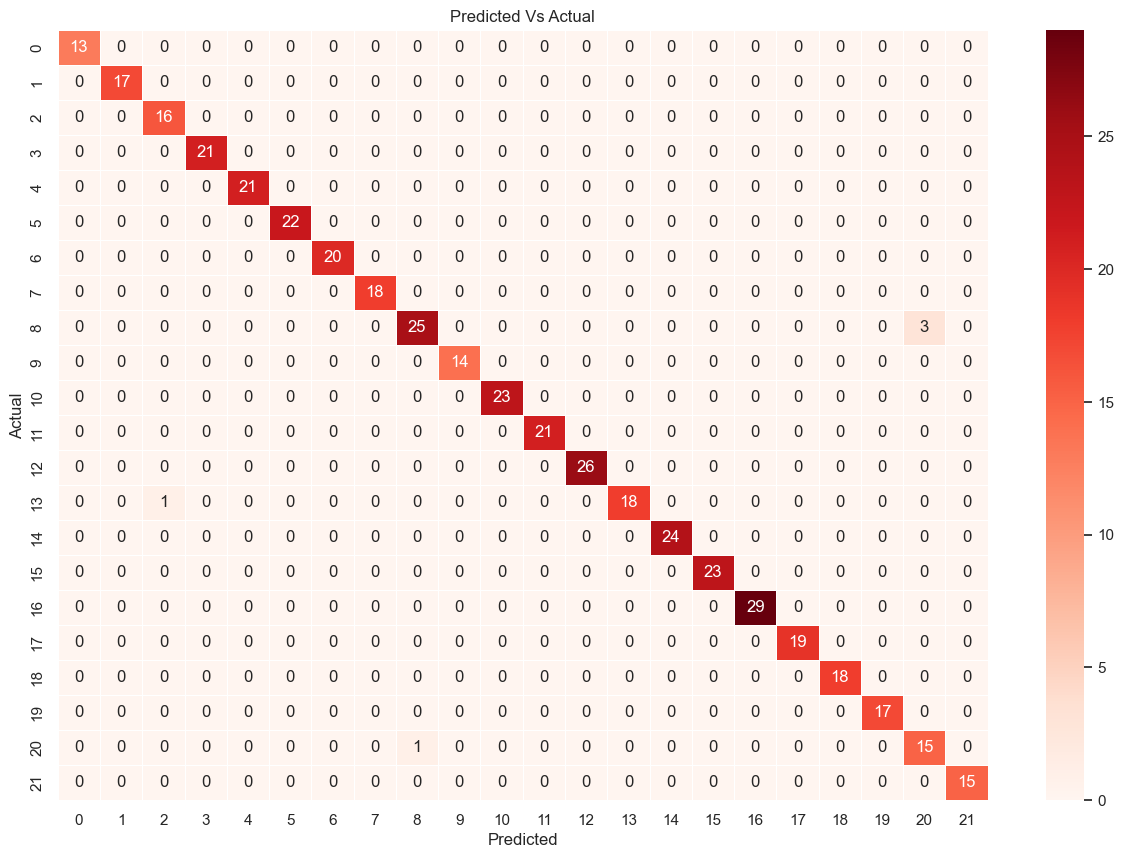

In [97]:
#confusion_matrix

cm_Cat = confusion_matrix(y_true_actual, y_predicted_values)

fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(cm_Cat, annot = True, linewidth = 0.5, fmt = ".0f", cmap = 'Reds' , ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Predicted Vs Actual")
plt.show()

# 12. Stochastic Gradient Descent (SGD)

In [98]:
#Stochastic Gradient Descent (SGD)

sgd = SGDClassifier()
sgd.fit(x_train, y_train)

SGDClassifier()

## Validation Scores

In [99]:
#Validation score

score = cross_val_score(sgd, features, target, cv = 5)
print("Cross Validation Score: ", score)

Cross Validation Score:  [0.70909091 0.76136364 0.74318182 0.71590909 0.71818182]


## Train  Accuracy

In [100]:
#Train Accuracy
sgd_train_accuracy = sgd.score(x_train, y_train)
print("Stochastic Gradient Descent Train Accuracy: ", sgd_train_accuracy)

#Test Accuracy
sgd_test_accuracy = sgd.score(x_test, y_test)
print("Stochastic Gradient Descent Test Accuracy: ", sgd_test_accuracy)


Stochastic Gradient Descent Train Accuracy:  0.7289772727272728
Stochastic Gradient Descent Test Accuracy:  0.7045454545454546


# Predictions

In [101]:
y_predicted_values = sgd.predict(x_test)
y_true_actual = y_test

metrics_accuracy = metrics.accuracy_score(y_true_actual, y_predicted_values)
acc.append(metrics_accuracy)
model.append('Stochastic Gradient Descent')

print("Stochastic Gradient Descent Accuracy is ", metrics_accuracy)


Stochastic Gradient Descent Accuracy is  0.7045454545454546


# Classification Report

In [102]:
print("\n Classification Report:")
print(classification_report(y_true_actual, y_predicted_values))


 Classification Report:
              precision    recall  f1-score   support

       apple       0.54      1.00      0.70        13
      banana       1.00      0.76      0.87        17
   blackgram       0.15      0.88      0.25        16
    chickpea       1.00      0.95      0.98        21
     coconut       1.00      0.71      0.83        21
      coffee       1.00      0.91      0.95        22
      cotton       0.87      1.00      0.93        20
      grapes       1.00      0.56      0.71        18
        jute       0.00      0.00      0.00        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.92      0.52      0.67        23
       maize       0.00      0.00      0.00        21
       mango       1.00      0.42      0.59        26
   mothbeans       0.44      0.95      0.60        19
    mungbean       1.00      0.83      0.91        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
  

# Confusion matrix

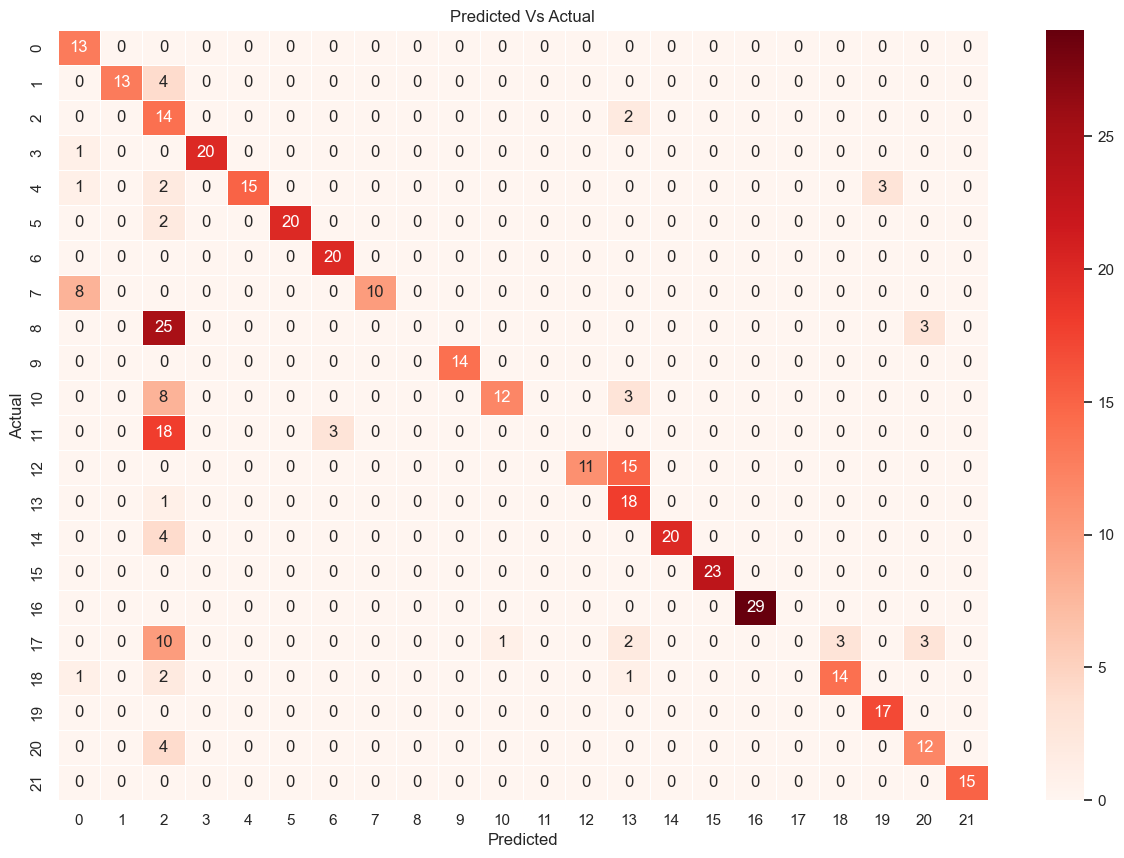

In [103]:
#confusion_matrix

cm_sgd = confusion_matrix(y_true_actual, y_predicted_values)

fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(cm_sgd, annot = True, linewidth = 0.5, fmt = ".0f", cmap = 'Reds' , ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Predicted Vs Actual")
plt.show()

# 13. Linear Discriminant Analysis (LDA)

In [104]:
#Linear Discriminant Analysis

lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

## Validation Scores

In [105]:
#Validation score

score = cross_val_score(lda, features, target, cv = 5)
print("Cross Validation Score: ", score)

Cross Validation Score:  [0.96363636 0.95454545 0.97272727 0.97272727 0.96136364]


## Train and Test Accuracy

In [106]:
#Train Accuracy
lda_train_accuracy = lda.score(x_train, y_train)
print("Linear Discriminant Analysis Train Accuracy: ", lda_train_accuracy)

#Test Accuracy
lda_test_accuracy = lda.score(x_test, y_test)
print("Linear Discriminant Analysis Test Accuracy: ", lda_test_accuracy)


Linear Discriminant Analysis Train Accuracy:  0.9693181818181819
Linear Discriminant Analysis Test Accuracy:  0.9568181818181818


# Predictions

In [107]:
y_predicted_values = lda.predict(x_test)
y_true_actual = y_test

metrics_accuracy = metrics.accuracy_score(y_true_actual, y_predicted_values)
acc.append(metrics_accuracy)
model.append('Linear Discriminant Analysis')

print("Linear Discriminant Analysis Accuracy is ", metrics_accuracy)


Linear Discriminant Analysis Accuracy is  0.9568181818181818


# Classification Report

In [108]:
print("\n Classification Report:")
print(classification_report(y_true_actual, y_predicted_values))


 Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.70      0.88      0.78        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.82      0.96      0.89        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.87      0.87      0.87        23
       maize       1.00      0.95      0.98        21
       mango       0.96      1.00      0.98        26
   mothbeans       1.00      0.79      0.88        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
  

# Confusion matrix

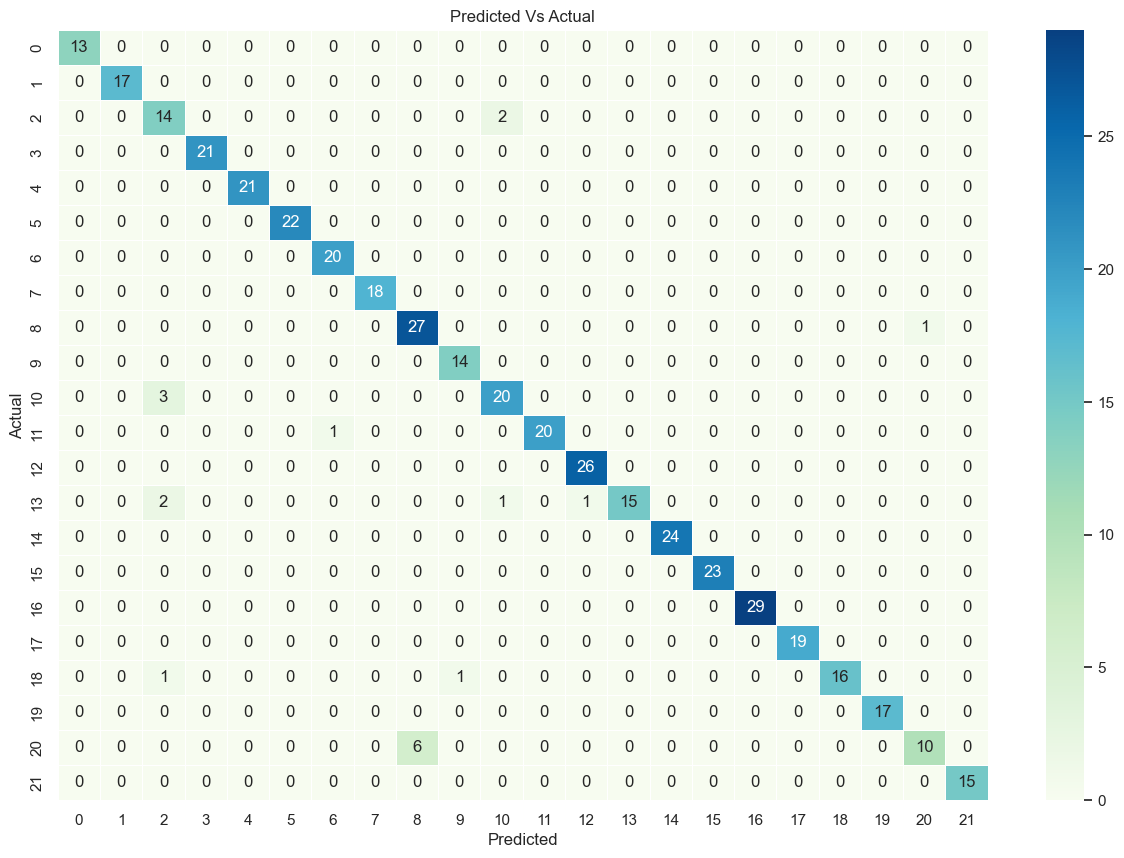

In [109]:
#confusion_matrix

cm_ABC = confusion_matrix(y_true_actual, y_predicted_values)

fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(cm_ABC, annot = True, linewidth = 0.5, fmt = ".0f", cmap = 'GnBu' , ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Predicted Vs Actual")
plt.show()

# 14.Quadratic Discriminant Analysis (QDA)


In [110]:
#Quadratic Discriminant Analysis (QDA)

qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train, y_train)

QuadraticDiscriminantAnalysis()

## Validation Scores

In [111]:
#Validation score

score = cross_val_score(qda, features, target, cv = 5)
print("Cross Validation Score: ", score)

Cross Validation Score:  [0.99090909 0.99545455 0.99318182 0.99318182 0.98863636]


## Train and Test Accuracy

In [112]:
#Train Accuracy
qda_train_accuracy = qda.score(x_train, y_train)
print("Quadratic Discriminant Analysis Train Accuracy: ", qda_train_accuracy)

#Test Accuracy
qda_test_accuracy = qda.score(x_test, y_test)
print("Quadratic Discriminant Analysis Test Accuracy: ", qda_test_accuracy)


Quadratic Discriminant Analysis Train Accuracy:  0.9960227272727272
Quadratic Discriminant Analysis Test Accuracy:  0.9863636363636363


# Predictions

In [113]:
y_predicted_values = qda.predict(x_test)
y_true_actual = y_test

metrics_accuracy = metrics.accuracy_score(y_true_actual, y_predicted_values)
acc.append(metrics_accuracy)
model.append('Quadratic Discriminant Analysis')

print("Quadratic Discriminant Analysis Accuracy is ", metrics_accuracy)


Quadratic Discriminant Analysis Accuracy is  0.9863636363636363


# Classification Report

In [114]:
print("\n Classification Report:")
print(classification_report(y_true_actual, y_predicted_values))


 Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      0.93      0.91        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
  

# Confusion matrix

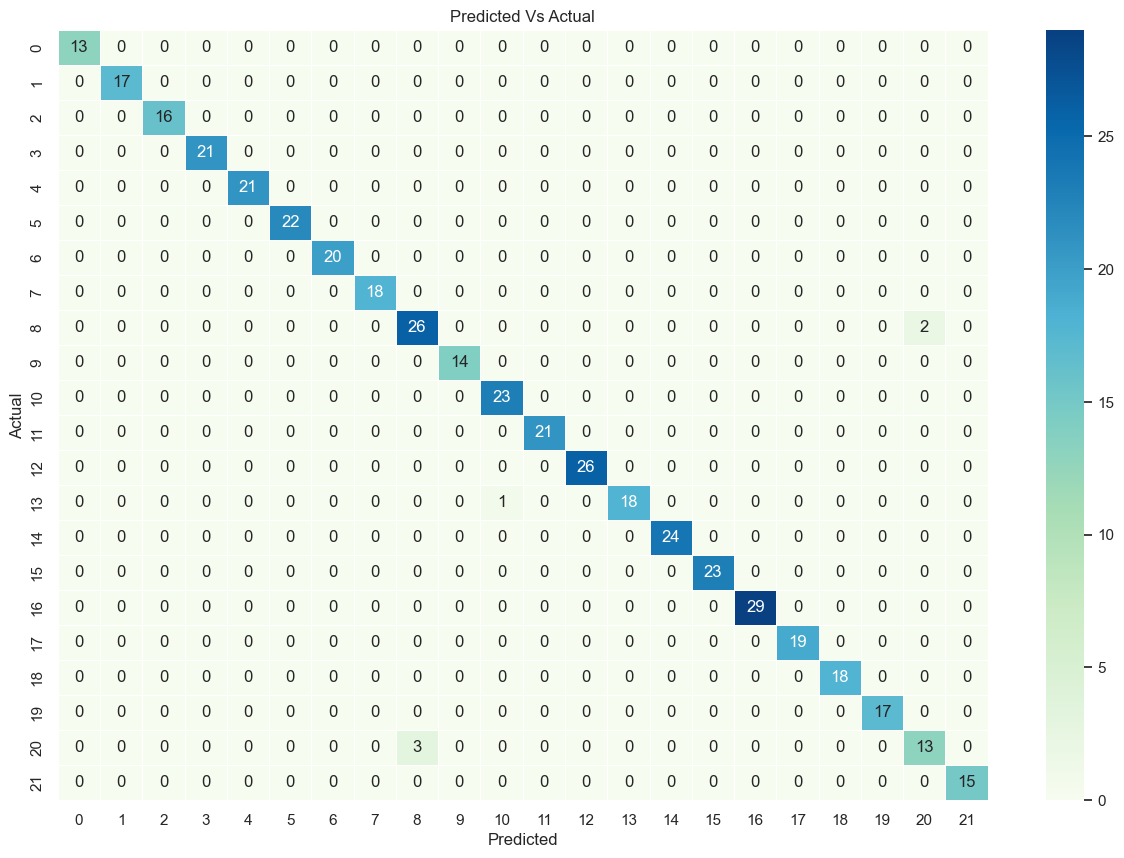

In [115]:
#confusion_matrix

cm_qda = confusion_matrix(y_true_actual, y_predicted_values)

fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(cm_qda, annot = True, linewidth = 0.5, fmt = ".0f", cmap = 'GnBu' , ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Predicted Vs Actual")
plt.show()

# 15.GradientBoostingClassifier(GBC)


In [116]:
#Gradient Boosting Classifier(GBC)

GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)

GradientBoostingClassifier()

## Validation Scores

In [117]:
#Validation score

score = cross_val_score(qda, features, target, cv = 5)
print("Cross Validation Score: ", score)

Cross Validation Score:  [0.99090909 0.99545455 0.99318182 0.99318182 0.98863636]


## Train and Test Accuracy

In [118]:
#Train Accuracy
GBC_train_accuracy = GBC.score(x_train, y_train)
print("Gradient Boosting Classifier Train Accuracy: ", GBC_train_accuracy)

#Test Accuracy
GBC_test_accuracy = GBC.score(x_test, y_test)
print("Gradient Boosting Classifier Test Accuracy: ", GBC_test_accuracy)


Gradient Boosting Classifier Train Accuracy:  1.0
Gradient Boosting Classifier Test Accuracy:  0.9931818181818182


# Predictions

In [119]:
y_predicted_values = GBC.predict(x_test)
y_true_actual = y_test

metrics_accuracy = metrics.accuracy_score(y_true_actual, y_predicted_values)
acc.append(metrics_accuracy)
model.append('Gradient Boosting Classifier')

print("Gradient Boosting Classifier Accuracy is ", metrics_accuracy)


Gradient Boosting Classifier Accuracy is  0.9931818181818182


# Classification Report

In [120]:
print("\n Classification Report:")
print(classification_report(y_true_actual, y_predicted_values))


 Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       1.00      0.93      0.96        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      0.96      0.98        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.95      1.00      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
  

# Confusion matrix

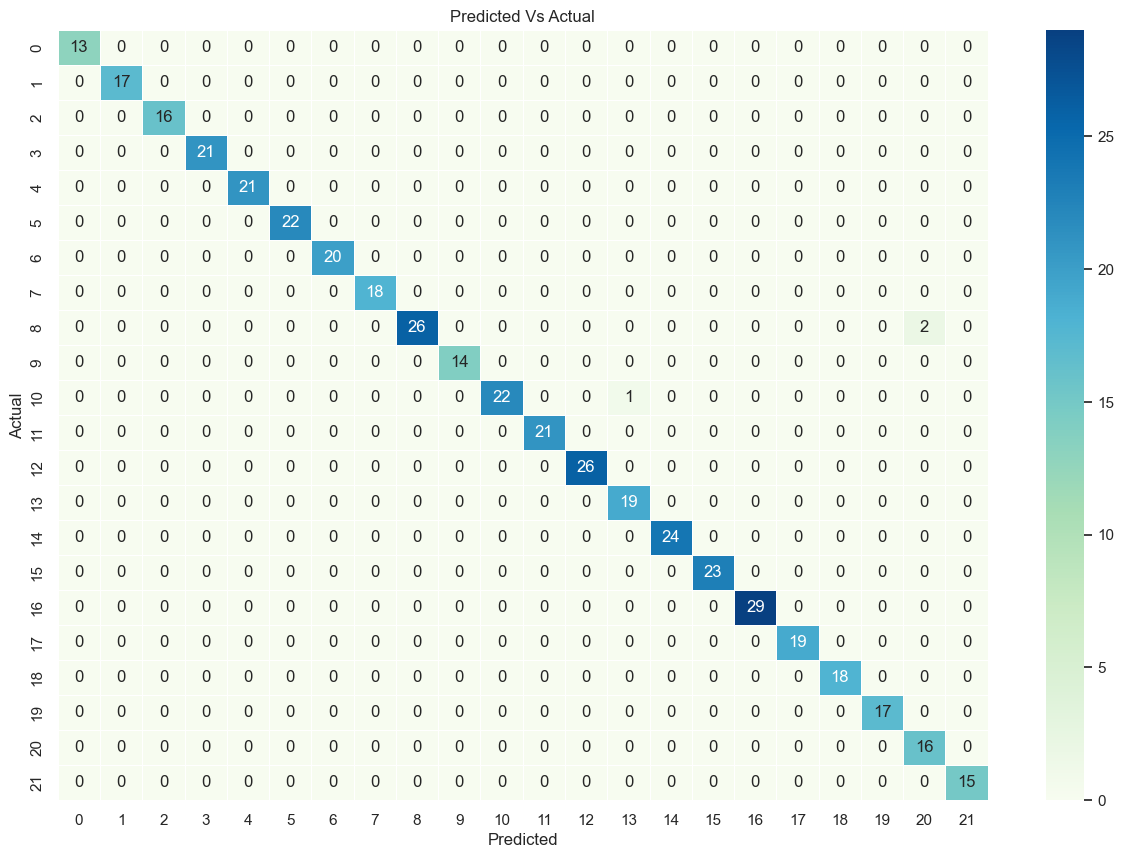

In [121]:
#confusion_matrix

cm_GBC = confusion_matrix(y_true_actual, y_predicted_values)

fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(cm_GBC, annot = True, linewidth = 0.5, fmt = ".0f", cmap = 'GnBu' , ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Predicted Vs Actual")
plt.show()

# 16.XGBoost

In [122]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train) 
#y_train = le.inverse_transform(y_train)
#y_train must be in a numeric form for XBoost

In [123]:
#XGBoost Classifier

# Train a model using the scikit-learn API
XB = xgb.XGBClassifier()
XB.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

## Train and Test Accuracy

In [124]:
#Train Accuracy
XB_train_accuracy = XB.score(x_train, y_train)
print("XBoost Classifier Train Accuracy: ", XB_train_accuracy)

XBoost Classifier Train Accuracy:  1.0


# Predictions

In [125]:
y_predicted_values = XB.predict(x_test)
y_predicted_values = le.inverse_transform(y_predicted_values)
y_true_actual = y_test

metrics_accuracy = metrics.accuracy_score(y_true_actual, y_predicted_values)
acc.append(metrics_accuracy)
model.append('XBoost Classifier')

print("XBoost Classifier Accuracy is ", metrics_accuracy)


XBoost Classifier Accuracy is  0.9931818181818182


# Classification Report

In [126]:
print("\n Classification Report:")
print(classification_report(y_true_actual, y_predicted_values))


 Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       0.96      1.00      0.98        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       1.00      0.93      0.96        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
  

# Confusion matrix

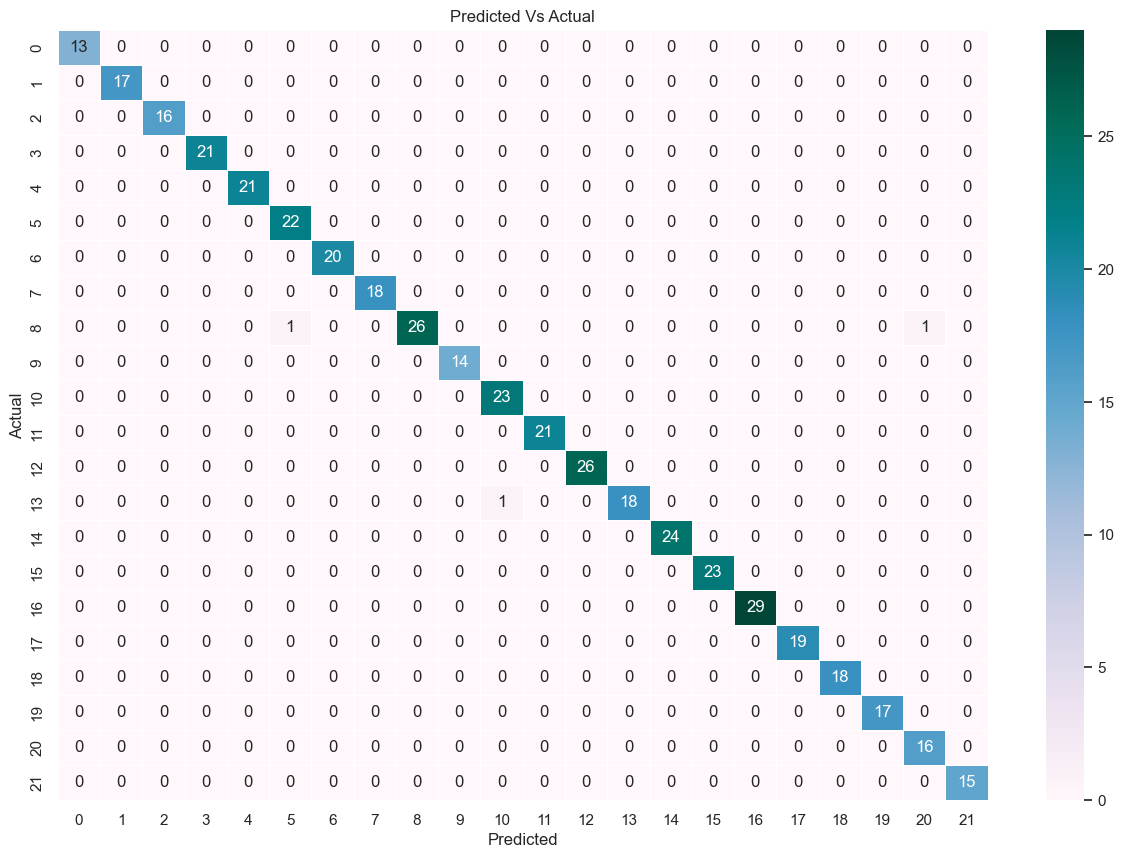

In [127]:
#confusion_matrix

cm_XB = confusion_matrix(y_true_actual, y_predicted_values)

fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(cm_XB, annot = True, linewidth = 0.5, fmt = ".0f", cmap = 'PuBuGn' , ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Predicted Vs Actual")
plt.show()

# Accuracy comparison

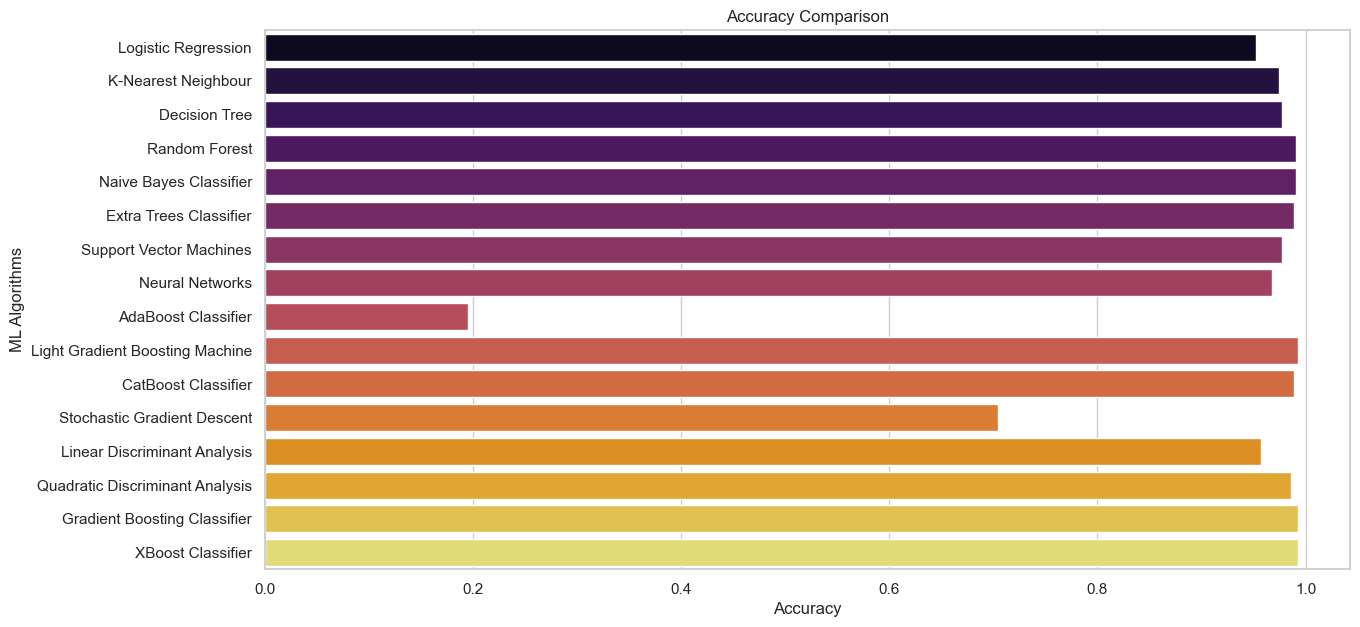

In [128]:
plt.figure(figsize=[14,7],dpi = 100, facecolor='white')
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('ML Algorithms')
sns.barplot(x = acc,y = model,palette='inferno')
plt.savefig('Accuracy_Comparision.png', dpi=300, bbox_inches='tight')

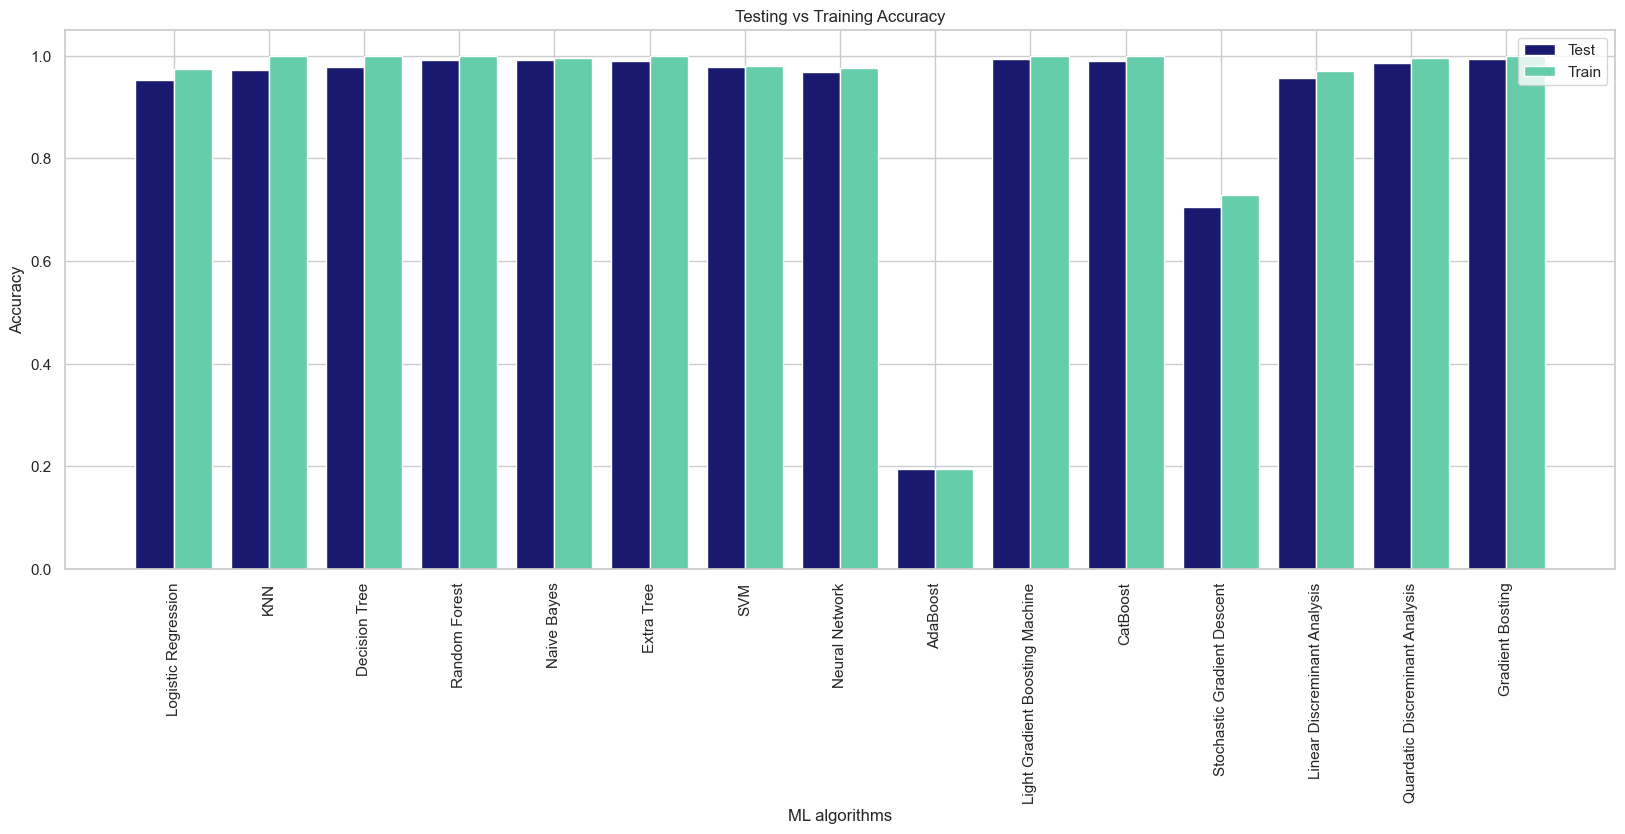

In [129]:
label = ['Logistic Regression','KNN', 'Decision Tree','Random Forest','Naive Bayes', 'Extra Tree',
         'SVM', 'Neural Network', 'AdaBoost', 'Light Gradient Boosting Machine', 'CatBoost', 
         'Stochastic Gradient Descent', 'Linear Discreminant Analysis', 'Quardatic Discreminant Analysis',
         'Gradient Bosting']

Test = [LR_test_accuracy, knn_test_accuracy, DT_test_Accuracy, RF_test_accuracy,
        NBC_test_accuracy, ET_test_accuracy, svm_test_accuracy, 
        NN_MLP_test_accuracy, ABC_test_accuracy, lgbm_test_accuracy,
        cat_test_accuracy, sgd_test_accuracy, lda_test_accuracy, 
        qda_test_accuracy, GBC_test_accuracy]

Train = [LR_train_accuracy, knn_train_accuracy, DT_train_accuracy, RF_train_accuracy,
         NBC_train_accuracy, ET_train_accuracy, svm_train_accuracy, 
         NN_MLP_train_accuracy, ABC_test_accuracy, lgbm_train_accuracy, 
         cat_train_accuracy, sgd_train_accuracy, lda_train_accuracy, 
         qda_train_accuracy, GBC_train_accuracy]



fig, ax = plt.subplots(figsize=(20,7)) # set the size that you'd like (width, height)
X_axis = np.arange(len(label))
plt.bar(X_axis - 0.2,Test, 0.4, label = 'Test', color=('midnightblue'))
plt.bar(X_axis + 0.2,Train, 0.4, label = 'Train', color=('mediumaquamarine'))

plt.xticks(X_axis, label)
plt.xticks(rotation = 90)
plt.xlabel("ML algorithms")
plt.ylabel("Accuracy")
plt.title("Testing vs Training Accuracy")
plt.legend()
plt.savefig('Train Vs test accuracy.png', dpi=300, bbox_inches='tight')
plt.show()
